In [2]:
from import_RNA import *

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.18.1 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.6


In [3]:
import warnings

warnings.filterwarnings('ignore')

# Type-level DE

In [4]:
L23_1d = sc.read_h5ad('h5ads_cmprsd/P22_1d_L23_mappedP22.h5ad')
L23_P22 = sc.read_h5ad('h5ads_cmprsd/P22_L23.h5ad')

L23_1d.X = L23_1d.raw.X
L23_P22.X = L23_P22.raw.X

In [5]:
del L23_1d.raw
del L23_P22.raw

In [6]:
L23_1d = L23_1d[:,~L23_1d.var_names.str.startswith('Rp')].copy()
L23_1d = L23_1d[:,~L23_1d.var_names.str.startswith('mt')].copy()
L23_1d = L23_1d[:,~L23_1d.var_names.str.startswith('Gm')].copy()

In [7]:
L23_P22 = L23_P22[:,~L23_P22.var_names.str.startswith('Rp')].copy()
L23_P22 = L23_P22[:,~L23_P22.var_names.str.startswith('mt')].copy()
L23_P22 = L23_P22[:,~L23_P22.var_names.str.startswith('Gm')].copy()

In [8]:
L23_1d.shape, L23_P22.shape

((5054, 17306), (9681, 17306))

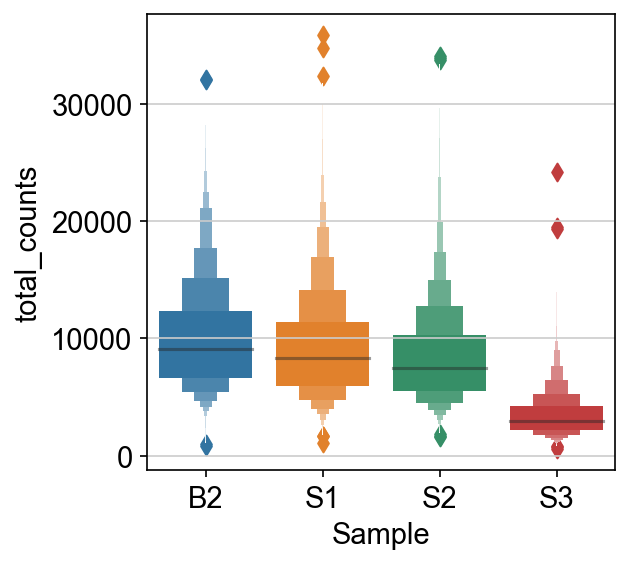

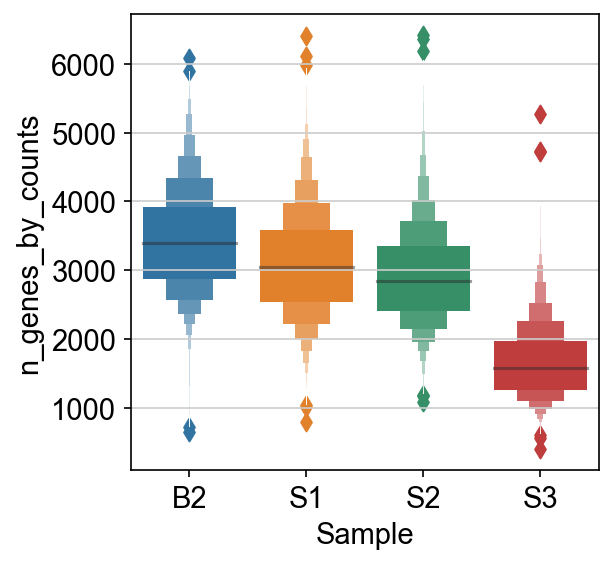

In [9]:
sn.boxenplot(data=L23_P22.obs, x='Sample', y='total_counts')
plt.show()
sn.boxenplot(data=L23_P22.obs, x='Sample', y='n_genes_by_counts')

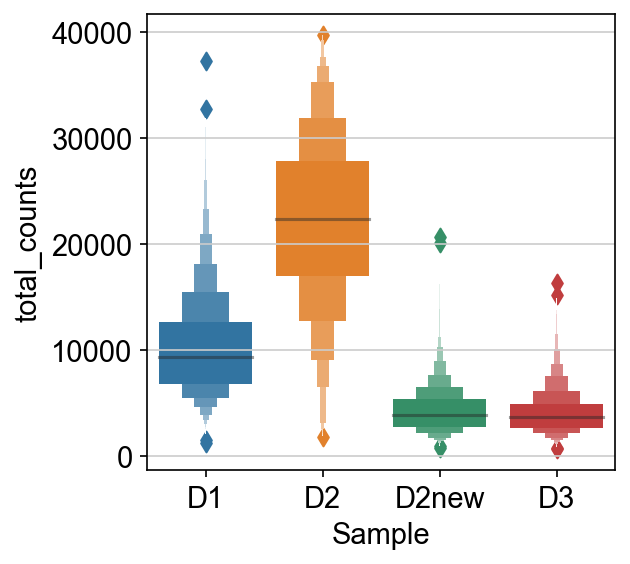

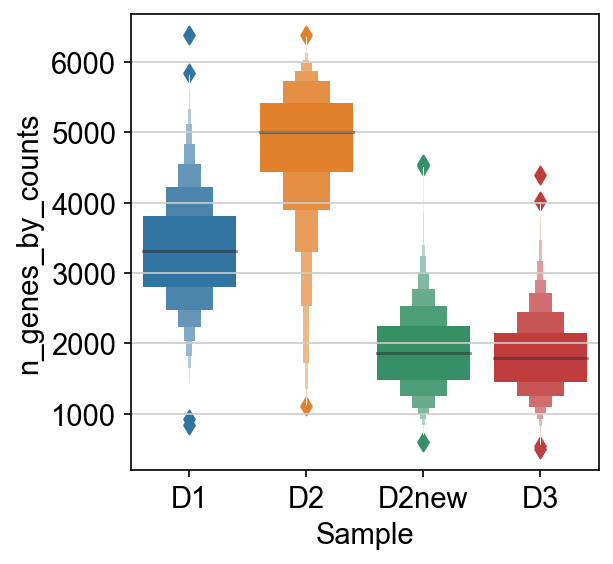

In [10]:
sn.boxenplot(data=L23_1d.obs, x='Sample', y='total_counts')
plt.show()
sn.boxenplot(data=L23_1d.obs, x='Sample', y='n_genes_by_counts')

In [11]:
L23_1d.obs.Type

AAAGAACCACCGCTGA-1-D1-0-0    L2/3_B
AAAGGGCAGACAAGCC-1-D1-0-0    L2/3_C
AAAGGGCCAAAGCAAT-1-D1-0-0    L2/3_C
AAAGGGCGTGCTTATG-1-D1-0-0    L2/3_B
AAAGTCCTCACTGGGC-1-D1-0-0    L2/3_B
                              ...  
TTTACGTAGGCTGTAG-1-D3-4-0    L2/3_A
TTTAGTCTCTCACCCA-1-D3-4-0    L2/3_A
TTTATGCCATTACTCT-1-D3-4-0    L2/3_A
TTTCAGTAGACATACA-1-D3-4-0    L2/3_A
TTTGATCCACTGAGGA-1-D3-4-0    L2/3_A
Name: Type, Length: 5054, dtype: category
Categories (3, object): ['L2/3_A', 'L2/3_B', 'L2/3_C']

In [12]:
L23_P22 = L23_P22[L23_P22.obs.Sample!='S3'].copy()

L23_1d = L23_1d[L23_1d.obs.Sample!='D2new',:].copy()
L23_1d = L23_1d[L23_1d.obs.Sample!='D3',:].copy()


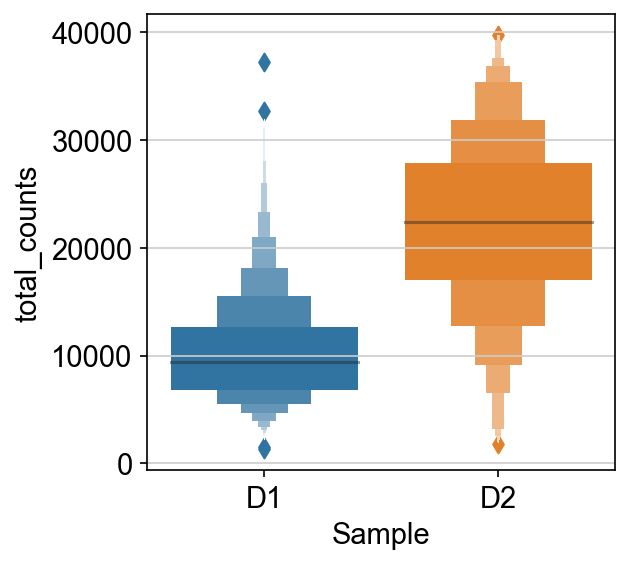

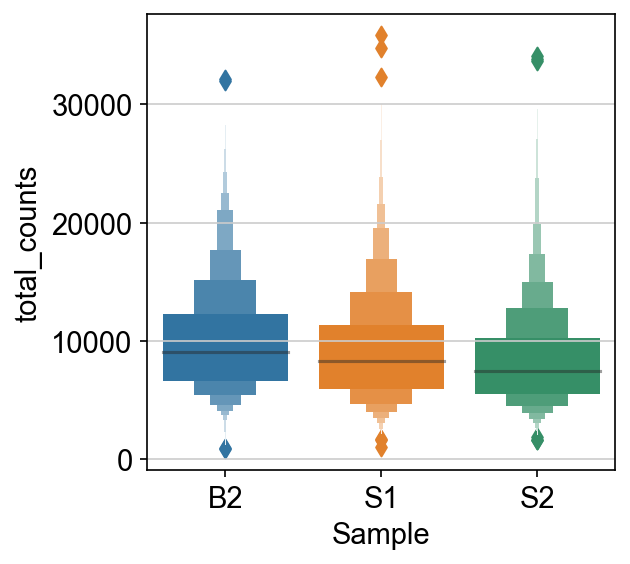

In [13]:
sn.boxenplot(data=L23_1d.obs, x='Sample', y='total_counts')
plt.show()
sn.boxenplot(data=L23_P22.obs, x='Sample', y='total_counts')


In [14]:
L23_1d.obs['P22 Mapping Label'].value_counts()

L2/3_C    898
L2/3_B    694
L2/3_A    671
Name: P22 Mapping Label, dtype: int64

## Run DE

In [15]:
L23_1d.shape, L23_P22.shape

((2263, 17306), (7168, 17306))

In [16]:
L23_1d.X, L23_P22.X

(<2263x17306 sparse matrix of type '<class 'numpy.float32'>'
 	with 7466775 stored elements in Compressed Sparse Row format>,
 <7168x17306 sparse matrix of type '<class 'numpy.float32'>'
 	with 20901971 stored elements in Compressed Sparse Row format>)

In [17]:
L23_1d.obs['Type'] = L23_1d.obs['P22 Mapping Label'] 

In [18]:
gluta = L23_1d.concatenate(L23_P22, batch_key='batch', batch_categories=['P22-1dWD', 'P22'])

In [19]:
gluta.raw = gluta

In [20]:
gluta.obs['batch']

AAAGAACCACCGCTGA-1-D1-0-0-P22-1dWD    P22-1dWD
AAAGGGCAGACAAGCC-1-D1-0-0-P22-1dWD    P22-1dWD
AAAGGGCCAAAGCAAT-1-D1-0-0-P22-1dWD    P22-1dWD
AAAGGGCGTGCTTATG-1-D1-0-0-P22-1dWD    P22-1dWD
AAAGTCCTCACTGGGC-1-D1-0-0-P22-1dWD    P22-1dWD
                                        ...   
GTTAGTGGTCAAGTTC-1-S2-12-0-P22             P22
TTCAATCAGACCATAA-1-S2-12-0-P22             P22
AGTAGCTGTGAATTGA-1-B2-12-0-P22             P22
TGCGACGGTACTCGCG-1-S1-14-0-P22             P22
GGACGTCAGTAACCGG-1-S2-15-0-P22             P22
Name: batch, Length: 9431, dtype: category
Categories (2, object): ['P22-1dWD', 'P22']

In [21]:
gluta_dict_WD1d = dict()
for i in ['L2/3_A', 'L2/3_B', 'L2/3_C']:
    df = DE(gluta[gluta.obs['Type']==i,:], obs_id='batch', 
                               obs_id_test='P22-1dWD', ref='rest', pts_thresh=0.3, lf_thresh=0.6)
    #df = df[df['LF']<4]
    gluta_dict_WD1d[i+'_WD1d'] = df[df['p_adj']<0.05]
    #gluta_dict_WD1d[i+'_WD1d'] = df

del df
gluta_dict_P22 = dict()
for i in ['L2/3_A', 'L2/3_B', 'L2/3_C']:

    df = DE(gluta[gluta.obs['Type']==i,:], obs_id='batch', 
                              obs_id_test='P22', ref='rest', pts_thresh=0.3, lf_thresh=0.6)
    
    #df = df[df['LF']<4]
    gluta_dict_P22[i+'_P22'] = df[df['p_adj']<0.05]
    #gluta_dict_P22[i+'_P22'] = df

cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level


Text(0.5, 0.98, 'P22>1d RWD')

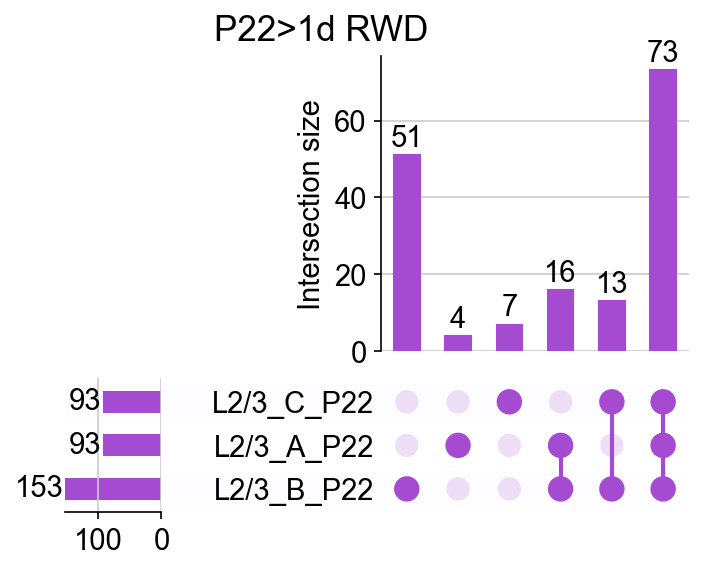

In [38]:
import upsetplot
contents=dict()
for i in gluta_dict_P22:
    contents[i]=list(gluta_dict_P22[i].index)
a = upsetplot.from_contents(contents)
upsetplot.plot(a, sort_by='degree', show_counts=True,min_subset_size=1,
              facecolor='#A44BD1', shading_color=0.01,)
plt.suptitle('P22>1d RWD')

Text(0.5, 0.98, '1dWD>P22')

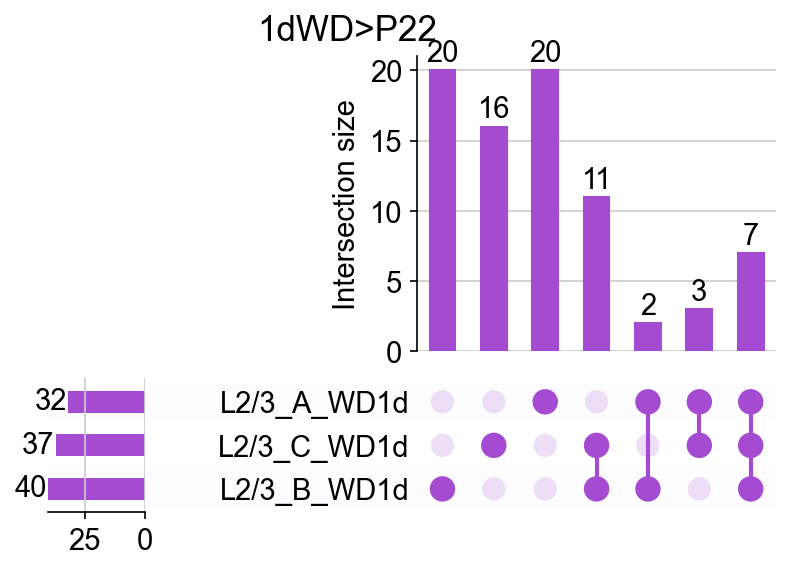

In [39]:
import upsetplot
contents=dict()
for i in gluta_dict_WD1d:
    contents[i]=list(gluta_dict_WD1d[i].index)
a = upsetplot.from_contents(contents)
upsetplot.plot(a, sort_by='degree', show_counts=True,min_subset_size=1,
              facecolor='#A44BD1', shading_color=0.01,)
plt.suptitle('1dWD>P22')

In [40]:
type_batch = []
for i in range(gluta.shape[0]):
    type_batch.append(gluta.obs['Type'][i]+' '+gluta.obs['batch'][i])
gluta.obs['Type_Cond'] = pd.Categorical(type_batch)

In [41]:
'Bdnf' in gluta_dict_WD1d['L2/3_B_WD1d'].index

True

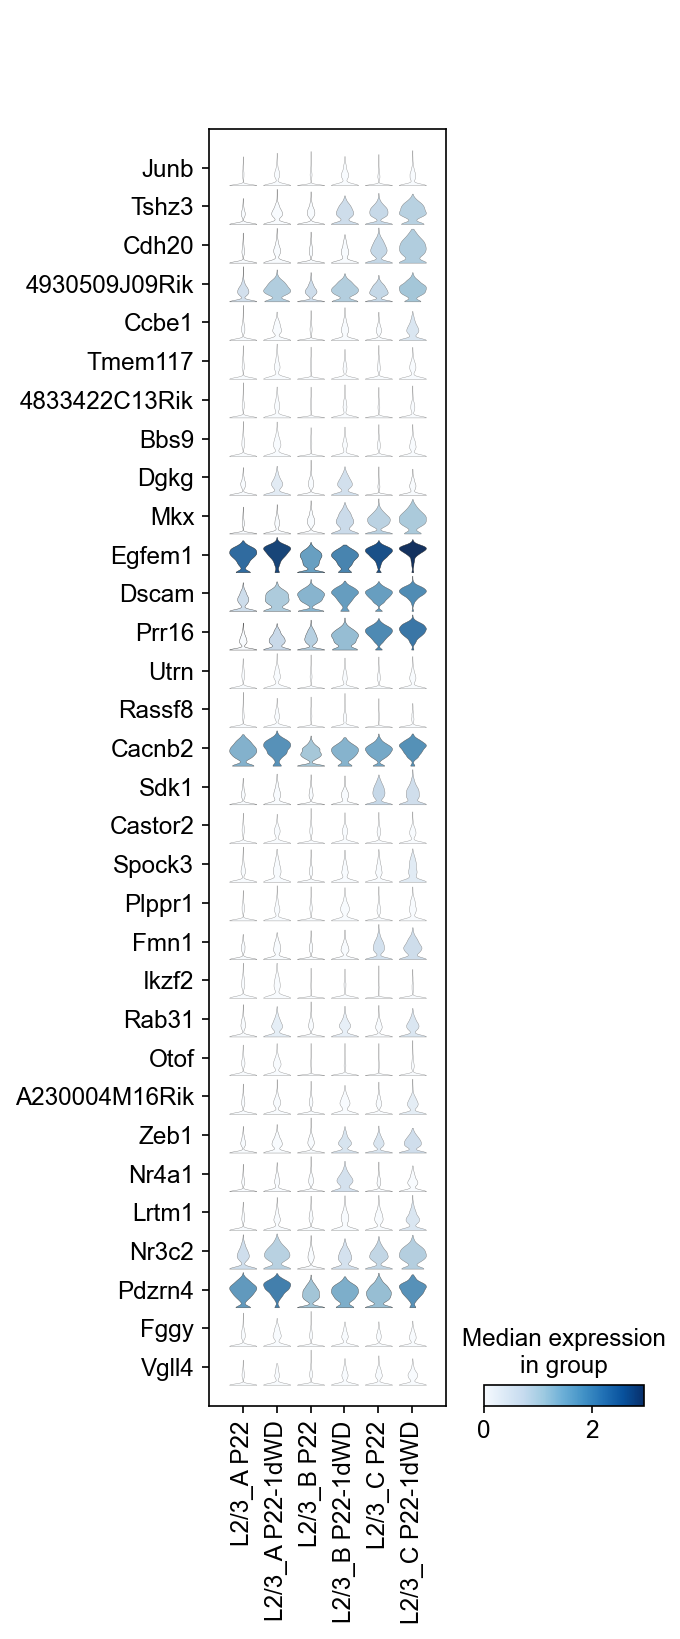

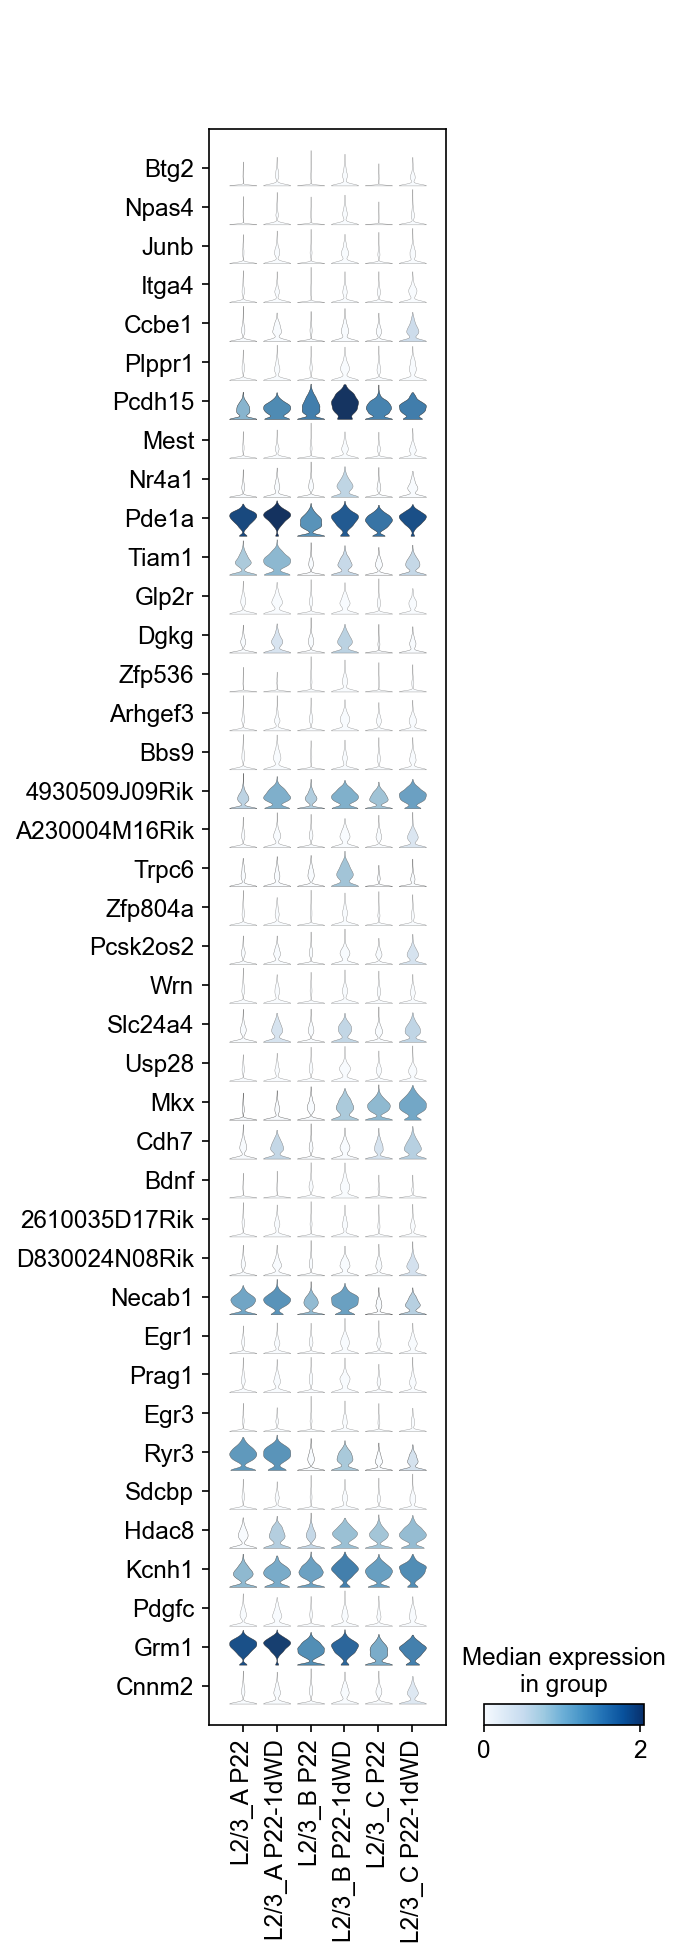

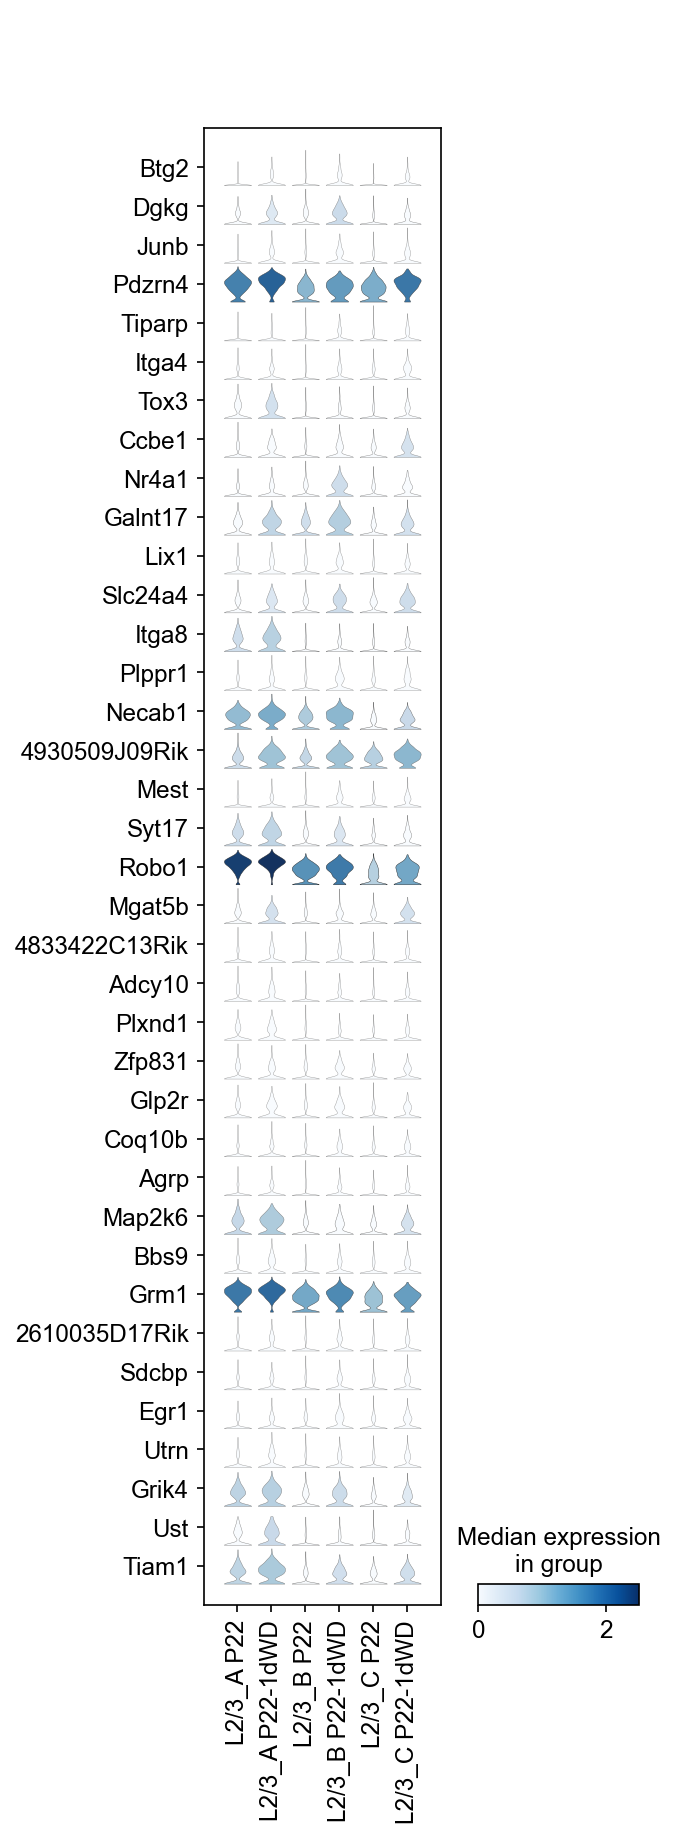

In [42]:
sc.pl.stacked_violin(gluta, var_names=gluta_dict_WD1d['L2/3_A_WD1d'].index, groupby='Type_Cond', swap_axes=True)
sc.pl.stacked_violin(gluta, var_names=gluta_dict_WD1d['L2/3_B_WD1d'].index, groupby='Type_Cond', swap_axes=True)
sc.pl.stacked_violin(gluta, var_names=gluta_dict_WD1d['L2/3_C_WD1d'].index, groupby='Type_Cond', swap_axes=True)

In [23]:
IEGs = ['Arc', 'Arl4d', 'Arl5b', 'Bdnf', 'Cdc42ep3', 'Cdkn1a', 'Cited2', 'Crem', 'Dnajb1', 'Dnajb5', 'Dusp1', 'Dusp14', 'Dusp6', 'Egr1', 'Egr2', 'Egr4', 'Fbxo33', 'Fos', 'Fosb', 'Fosl2', 'Frmd6', 'Gadd45b', 'Gadd45g', 'Gm13889', 'Grasp', 'Homer1', 'Ifrd1', 'Irs2', 'Junb', 'Kdm7a', 'Mest', 'Midn', 'Nefm', 'Npas4', 'Nptx2', 'Nr4a1', 'Nr4a2', 'Nr4a3', 'Per1', 'Phf21b', 'Phlda1', 'Pim1', 'Pim3', 'Ptgs2', 'R3hdm1', 'Rheb', 'Sat1', 'Scg2', 'Spry2', 'Stk40', 'Tfrc', 'Tiparp', 'Tnfaip6', 'Vgf', 'Zdbf2', 'Camk1g', 'Cbln4', 'Gfod1', 'Klf10', 'Sertad1', 'Bhlhe40', 'Nab2', 'B930041F14Rik', 'Chuk', 'Cyp51', 'Drg1', 'Lrrk2', 'P4ha1', 'Scn3b', 'Snhg3', 'Trib1', 'Adrb1', 'Hivep3', 'Sgk1', 'Ankrd33b', 'Gadd45a', 'Ina', 'Nrn1', 'Htatsf1', 'Ube2g1', 'Crh', 'Fam214a', 'Gpd1', 'Gtf3c1', 'Keap1', 'Kras', 'Prpsap2', 'Rps29', 'Socs2', 'Tubb5', 'Vta1', 'C1qb', 'Cenpb', 'Csf1r', 'Gm28578', 'Hmces', 'Nrd1', 'Plp1', 'Plpp4', 'Prrc2a', 'Ssh1', '1190002N15Rik', 'Acsl4', 'Adal', 'Ccnt1', 'Chrac1', 'Cpne8', 'Dlx2', 'Fam150b', 'Fam46a', 'Glul', 'Gpt2', 'Kctd12', 'Noct', 'Ntrk3', 'Paqr8', 'Pcnp', 'Prickle2', 'Snd1', 'Sox2', 'Tcof1', 'Wbp5', 'Zkscan1', 'Zmiz2', 'Alcam', 'Cpeb1', 'Lig3', 'Syt4', 'Timp2', 'Ubfd1', 'Ctsb', 'Elavl4', 'Serpini1', 'Snx19', 'Usp1', 'Arrdc3', 'Hspa1b', 'Hspa5', 'Mt1', 'Ndufv1', 'Trmt44', 'Hspa1a', 'Mt2', 'Acad12', 'Ppfia1', 'Cdr2', 'Pex11b', 'Ppnr', 'Ssfa2', 'Avl9', 'Ctnnd2', 'Hsph1', 'Slc1a2', 'Ten1', 'Pou3f1', 'Adamts13', 'Bambi', 'Ccnl1', 'Cebpb', 'Coq10b', 'Cyr61', 'Dclk1', 'Dio2', 'Emd', 'Eprs', 'Gem', 'Gm3764', 'Gstm3', 'Hes5', 'Klf4', 'Ptp4a1', 'Rgs2', 'Tsc22d3', 'Ubc', 'Usp2', 'Usp53', 'Wdr31', '1810011O10Rik', 'Acta1', 'Actb', 'Actg1', 'Adamts1', 'Akap12', 'Apold1', 'Atf3', 'Atf4', 'Azin1', 'Bcl6b', 'Cd83', 'Clec14a', 'Clec2d', 'Clic4', 'Cnn2', 'Csrnp1', 'Ctgf', 'Dlc1', 'Dnaja1', 'Dusp8', 'Epha2', 'Fermt2', 'Gpx1', 'Hsp90aa1', 'Hsp90ab1', 'Hspa8', 'Hspb1', 'Ism1', 'Jund', 'Klf2', 'Maff', 'Mafk', 'Myadm', 'Nes', 'Picalm', 'Plaur', 'Pnkd', 'Ptpn12', 'Rassf1', 'Serpinh1', 'Skil', 'Srf', 'Swap70', 'Timp3', 'Tinagl1', 'Tnfrsf12a', 'Tpm4', 'Tril', 'Tuba1c', 'Vasp', 'Vcl', 'Wdr1', 'Zyx', 'Ankrd37', 'Dcaf7', 'Fibp', 'Mal', 'Mbp', 'Myl12a', 'Nedd9', 'Pak1ip1', 'Zfp36', '2210016L21Rik', 'Adamts10', 'Ajuba', 'Ano6', 'Atraid', 'Bcl2l2', 'Cflar', 'Chordc1', 'Cldn5', 'Clu', 'Commd7', 'Crispld2', 'Cspg4', 'Cttnbp2nl', 'Dbi', 'Dbp', 'Elp2', 'Emp1', 'Enc1', 'Enpp2', 'Fam76b', 'Gpcpd1', 'Gstm5', 'Hopx', 'Hs3st1', 'Igfbp2', 'Iigp1', 'Ing3', 'Irgm2', 'Jkamp', 'Klf6', 'Klhl22', 'Lin52', 'Litaf', 'Lpar1', 'Lrrfip1', 'Manba', 'Mecom', 'Med10', 'Mrgbp', 'Mrpl35', 'Nov', 'Pdlim5', 'Plxna2', 'Ppdpf', 'Prdx2', 'Prickle1', 'Psmd5', 'Pxdc1', 'Rbm18', 'Rnd1', 'Sdhaf4', 'Slc1a3', 'Slc20a1', 'Slc25a25', 'Snx18', 'Sox4', 'Specc1l', 'St5', 'Stc1', 'Thsd1', 'Thsd4', 'Tmem252', 'Tpgs1', 'Trpc4', 'Ubald1', 'Ypel3', 'Zc3h7a', 'Aatk', 'Anp32e', 'Auts2', 'Bok', 'Bri3', 'C130074G19Rik', 'Cacul1', 'Cacybp', 'Ccnd2', 'Ceacam1', 'Crebrf', 'Crk', 'D030056L22Rik', 'Dctn1', 'Dhx8', 'Efna1', 'Fam107a', 'Hbp1', 'Hdac7', 'Ifnar2', 'Irf2bp2', 'Kcne4', 'Kif26a', 'Klf7', 'Klhl2', 'Lage3', 'Mapk3', 'Mat2a', 'Ndnf', 'Nrep', 'Paxip1', 'Phactr4', 'Rbm7', 'Rgcc', 'Rpl36al', 'S1pr1', 'Sema3g', 'Sfpq', 'Sirt2', 'Slc38a5', 'Smtn', 'Tmem242', 'Tpra1', 'Trim16', 'Tshz2', 'Txndc16', 'Zfp644', 'Ccl3', 'Ccl4', 'Ssb', 'Abhd6', 'Acss1', 'Agfg1', 'Apobec1', 'Atp13a2', 'Btg2', 'C5ar1', 'Ccdc117', 'Ccl2', 'Ccl7', 'Cracr2b', 'Ets2', 'Fech', 'Fkbp4', 'Fkbp5', 'Ftl1', 'Fxr1', 'Got1', 'Gpr157', 'Hacd3', 'Id2', 'Irf4', 'Jdp2', 'Kpna4', 'Lyve1', 'Magoh', 'Map2k7', 'Marcksl1', 'Mbtps2', 'Mob4', 'Pou2f2', 'Rnf215', 'Sdccag3', 'Selk', 'Sesn1', 'Slc15a3', 'Snap23', 'Srp54b', 'Tbc1d10a', 'Trim44', 'Vcam1', 'Ywhah', 'Zfp326', 'Anp32a', 'Atp5g2', 'Bpnt1', 'Cldn11', 'D10Jhu81e', 'Ephx3', 'Fam107b', 'Gprc5c', 'H1f0', 'Hcfc1', 'Lbh', 'Meg3', 'Nisch', 'Nodal', 'Nrgn', 'Odc1', 'Pde4b', 'Pvr', 'Sec24d', 'Slc35a5', 'Stard8', 'Tgfbi', 'B230216N24Rik', 'Cbln2', 'Dot1l', 'Egln1', 'Etv5', 'Fam19a1', 'Fmnl1', 'Hsd17b12', 'Inhba', 'Mapk4', 'Nefl', 'Nhp2l1', 'Ntrk2', 'Penk', 'Ppme1', 'Rasl10a', 'Sgsm1', 'Tpt1', 'Tsnax', 'Pde10a', 'Prkg2', 'Rnd3', 'Ier5', 'Atxn1', 'Hrh3', 'Iqgap2', 'Pcgf2', 'Pdlim1', 'Sh2d3c', 'Car12', 'Mapk6', 'Nrp1', 'Rcan2', 'Rprm', 'Tpbg', 'Ccnc', 'Eno1', 'H2-Q4', 'Igf1', 'Igfbp5', 'Pam', 'Serpine2', 'Syn2', 'Usp32', 'Fam76a', 'Isy1', '2210016F16Rik', 'Ankrd46', 'Arih1', 'Baiap2', 'Bex1', 'Cdk5r1', 'Cenpa', 'Crhbp', 'Dnajb14', 'Eef1e1', 'Elovl4', 'Gabra4', 'Gabrb1', 'Gars', 'Gphn', 'Grm1', 'Hcn1', 'Hunk', 'Itgav', 'Jarid2', 'Mdm2', 'Mknk1', 'Npy', 'Osbpl3', 'Pcdh17', 'Pwp1', 'Rap1a', 'Rusc1', 'Sccpdh', 'Tmtc4', 'Ubxn2b', 'Uckl1', 'Copb2', 'Cxcl14', 'Nlk', 'Pou3f3', 'Strn4', 'Tbc1d10b', 'Chp1', 'Col14a1', 'Lgi1', 'Llph', 'Ngef', 'Plppr4', 'Sept6', 'Nkain3', 'Tra2a', 'U2af2', 'Erf', 'S1pr2', 'Lypla2', 'Mvk', 'Rfx4', 'Angpt2', 'Anxa2', 'Atp1a2', 'Ccnd1', 'Mall', 'Sept4', 'Tuba1a', 'Msn', 'Adgrg1', 'Anxa3', 'Arpc1b', 'Atp5o', 'Bmp2', 'Cap2', 'Cast', 'Cdk17', 'Cmip', 'Csgalnact2', 'Ergic1', 'Fam114a1', 'Gkn3', 'H2afv', 'Lama4', 'Lox', 'Ltn1', 'Mpp5', 'Mxra8', 'Ntn4', 'Ptgds', 'Ptpn9', 'Ret', 'Rps26', 'Slc10a7', 'Slc12a2', 'Spag9', 'Thbd', 'Thbs1', 'Tk2', 'Tmtc1', 'Ackr3', 'Aldh2', 'Cpm', 'Ctla2b', 'Ddc', 'Fyn', 'Gnb2l1', 'Grb14', 'Gsk3b', 'Mga', 'Plcl1', 'Pls3', 'Rad54l2', 'Rnase4', 'Rps28', 'Sort1', 'Tmem229b', 'Zdhhc4', 'Nfxl1', 'Tmem106b', 'Ube2g2', 'Arap2', 'Ccl9', 'Ctla2a', 'Ddx26b', 'Letmd1', 'Man2a1', 'Mfsd7b', 'Pid1', 'Rps6ka3', 'Slc25a36', 'Tank', 'Zfand3', 'Abhd14b', 'Adcyap1r1', 'C1qtnf2', 'Cacna1h', 'Ccdc80', 'Dcbld2', 'Eps8', 'Krtcap2', 'Mib1', 'Ptk7', 'Rtn1', 'Smpdl3a', 'Snhg11', 'Spp1', 'Tmem9b', 'Tpm2', 'Uba5']

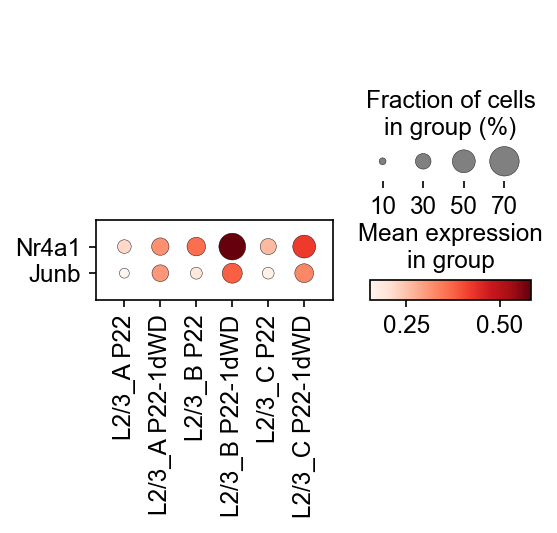

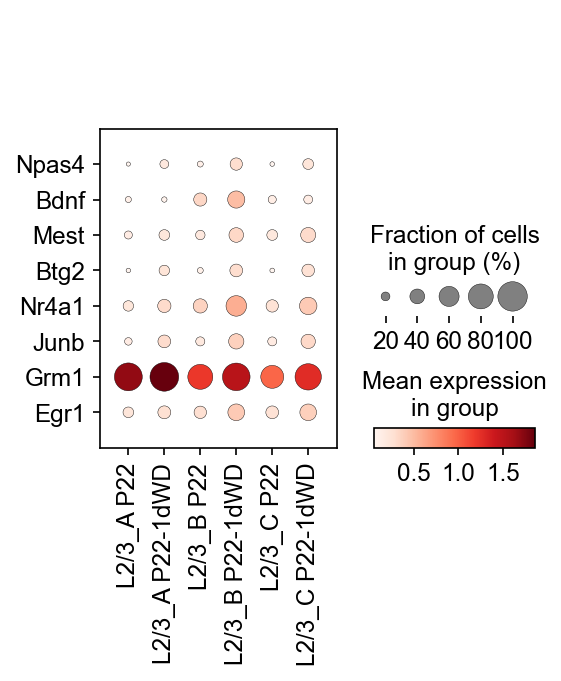

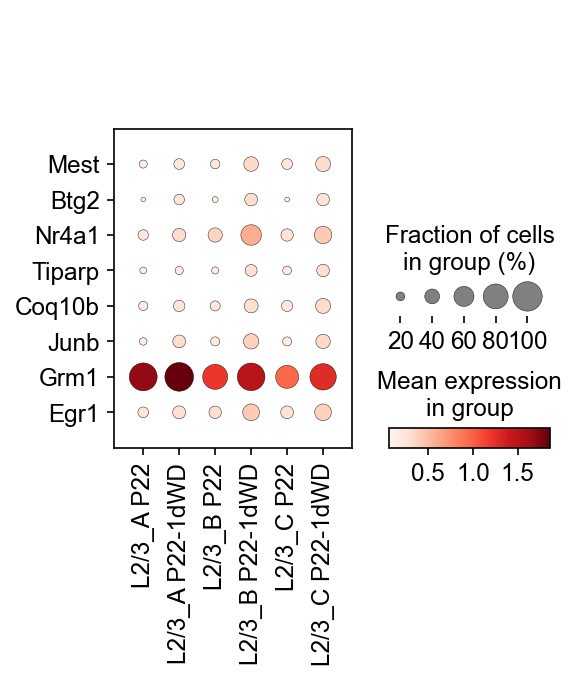

In [49]:

sc.pl.dotplot(gluta, var_names=list(set(gluta_dict_WD1d['L2/3_A_WD1d'].index).intersection(set(IEGs))), 
                     groupby='Type_Cond', swap_axes=True)
sc.pl.dotplot(gluta, var_names=list(set(gluta_dict_WD1d['L2/3_B_WD1d'].index).intersection(set(IEGs))),
                     groupby='Type_Cond', swap_axes=True)
sc.pl.dotplot(gluta, var_names=list(set(gluta_dict_WD1d['L2/3_C_WD1d'].index).intersection(set(IEGs))),
                     groupby='Type_Cond', swap_axes=True)

In [25]:
def LF_hmap(input_dict, hmap_cols, gene_list):

    out_dict = {}
    for g in gene_list:
        out_dict[g] = []
        for i in input_dict:
            df = input_dict[i]

            if(g in df.index):
                out_dict[g].append(input_dict[i].loc[g]['LF'])
            else:
                out_dict[g].append(0)
                
    out_df = pd.DataFrame(data=out_dict).transpose()
    out_df.columns = list(input_dict.keys())

    df_plt = pd.DataFrame(out_df.to_numpy(), index=gene_list, 
                 columns=hmap_cols)
    return df_plt

def remove_duplicates(input_list):
    seen = set()
    return [x for x in input_list if not (x in seen or seen.add(x))]

Text(0.5, 1.0, 'P22 1d AWD > P22 Genes in L2/3_A')

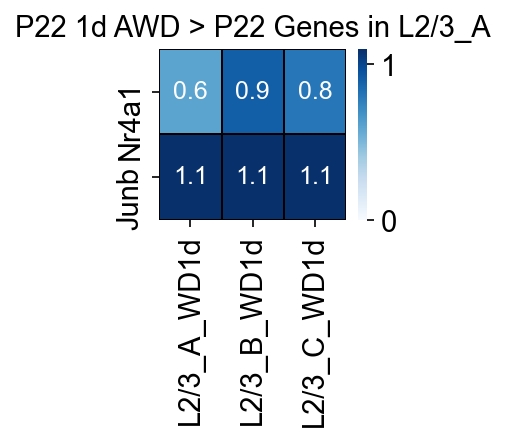

In [56]:
tenD_glut = LF_hmap(input_dict=gluta_dict_WD1d, 
                    hmap_cols=list(gluta_dict_WD1d.keys()), 
        gene_list=list(set(gluta_dict_WD1d['L2/3_A_WD1d'].index).intersection(set(IEGs))))

plt.figure(figsize=(2,1.5))
sn.heatmap(np.round(tenD_glut, 1), xticklabels=True, yticklabels=True, cmap='Blues', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 1d AWD > P22 Genes in L2/3_A')


Text(0.5, 1.0, 'P22 1d AWD > P22 Genes in L2/3_B')

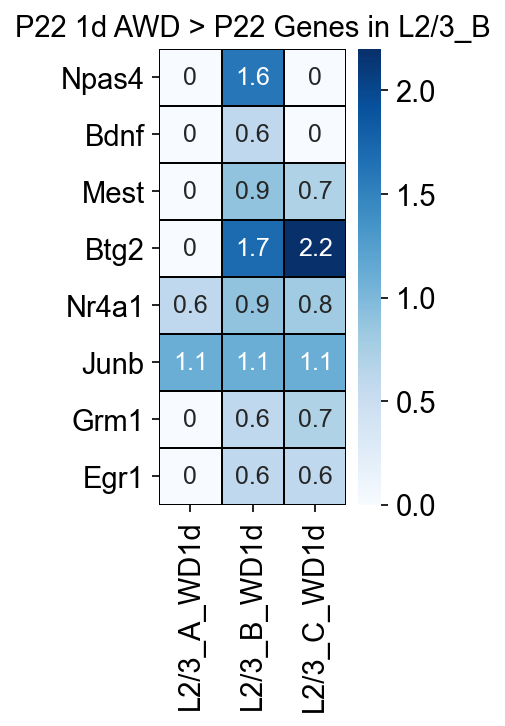

In [58]:
tenD_glut = LF_hmap(input_dict=gluta_dict_WD1d, 
                    hmap_cols=list(gluta_dict_WD1d.keys()), 
        gene_list=list(set(gluta_dict_WD1d['L2/3_B_WD1d'].index).intersection(set(IEGs))))

plt.figure(figsize=(2,4))
sn.heatmap(np.round(tenD_glut, 1), xticklabels=True, yticklabels=True, cmap='Blues', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 1d AWD > P22 Genes in L2/3_B')


Text(0.5, 1.0, 'P22 1d AWD > P22 Genes in L2/3_C')

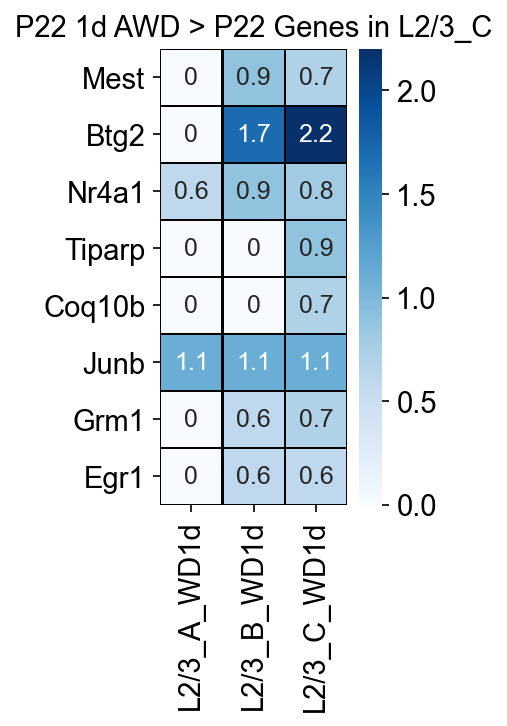

In [59]:
tenD_glut = LF_hmap(input_dict=gluta_dict_WD1d, 
                    hmap_cols=list(gluta_dict_WD1d.keys()), 
        gene_list=list(set(gluta_dict_WD1d['L2/3_C_WD1d'].index).intersection(set(IEGs))))

plt.figure(figsize=(2,4))
sn.heatmap(np.round(tenD_glut, 1), xticklabels=True, yticklabels=True, cmap='Blues', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 1d AWD > P22 Genes in L2/3_C')


Text(0.5, 1.0, 'P22 1d AWD > P22 IEGs')

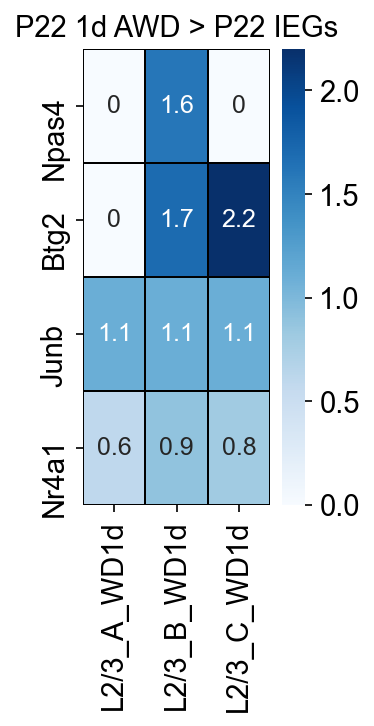

In [27]:
tenD_glut = LF_hmap(input_dict=gluta_dict_WD1d, 
                    hmap_cols=list(gluta_dict_WD1d.keys()), 
        gene_list=['Npas4', 'Btg2', 'Junb', 'Nr4a1'])

plt.figure(figsize=(2,4))
sn.heatmap(np.round(tenD_glut, 1), xticklabels=True, yticklabels=True, cmap='Blues', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 1d AWD > P22 IEGs')


# Set up datasets

In [101]:
WD1d = sc.read_h5ad('h5ads/P22-1dWD_gaba_v2.h5ad').concatenate(sc.read_h5ad('h5ads/P22-1dWD_glut_v2.h5ad'),
                                                            batch_key='Class', batch_categories=['GABAergic',
                                                                                                'Glutamatergic'])
P22 = sc.read_h5ad('h5ads/P22Sham_gaba_v2.h5ad').concatenate(sc.read_h5ad('h5ads/P22Sham_glut_v2.h5ad'),
                                                            batch_key='Class', batch_categories=['GABAergic',
                                                                                                'Glutamatergic'])


In [102]:
WD1d = WD1d[WD1d.obs.Type!='L2/3_mito',:]

In [103]:
suffix = "_P22-1dWD"
WD1d_subs = [item + suffix for item in list(WD1d.obs.Subclass)]
WD1d.obs['Subclass_age'] = pd.Categorical(WD1d_subs)

suffix = "_P22"
P22_subs = [item + suffix for item in list(P22.obs.Subclass)]
P22.obs['Subclass_age'] = pd.Categorical(P22_subs)

In [104]:
WD1d.X = WD1d.raw.X
P22.X = P22.raw.X
pipeline_short(WD1d, batch_correct=True, batch_ID='Sample')
pipeline_short(P22, batch_correct=True, batch_ID='Sample')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
Reach convergence after 6 iteration(s).


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
Reach convergence after 7 iteration(s).


sc.set_figure_params(dpi=100)

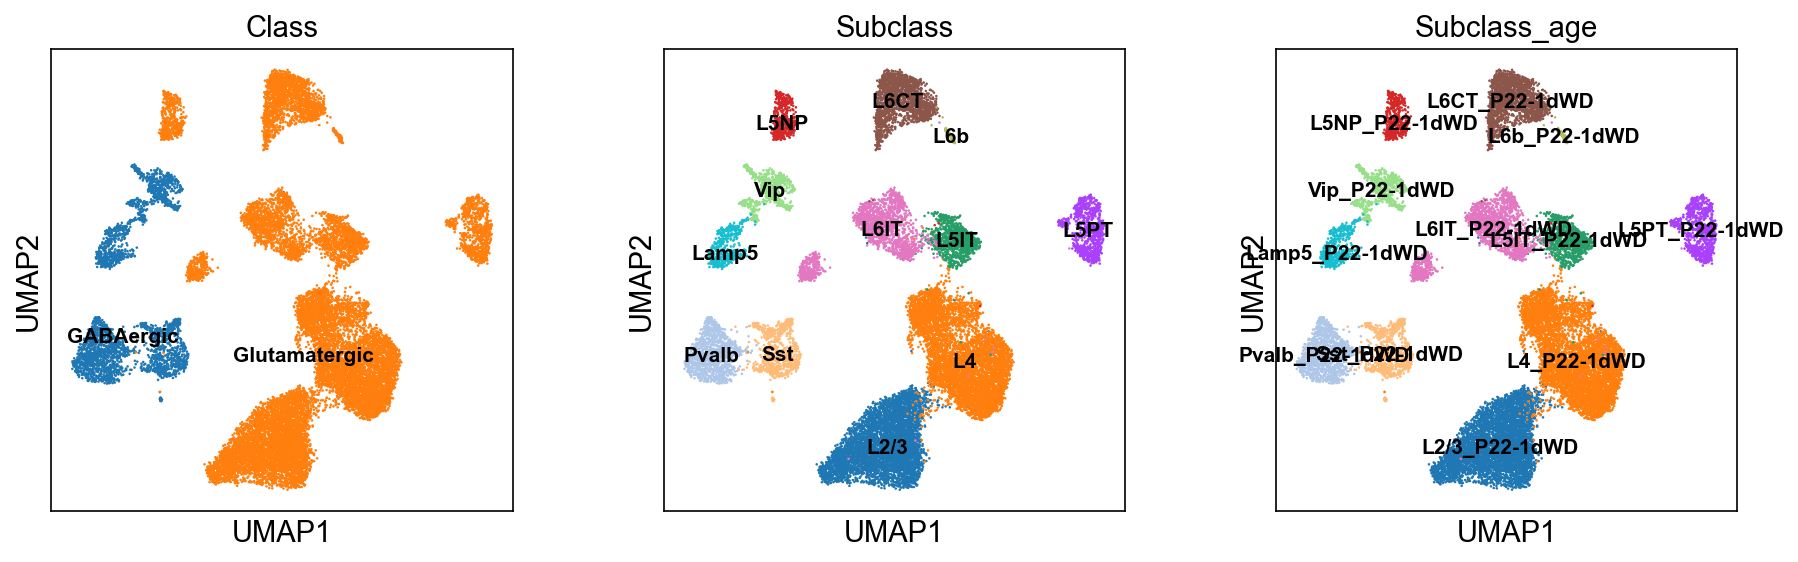

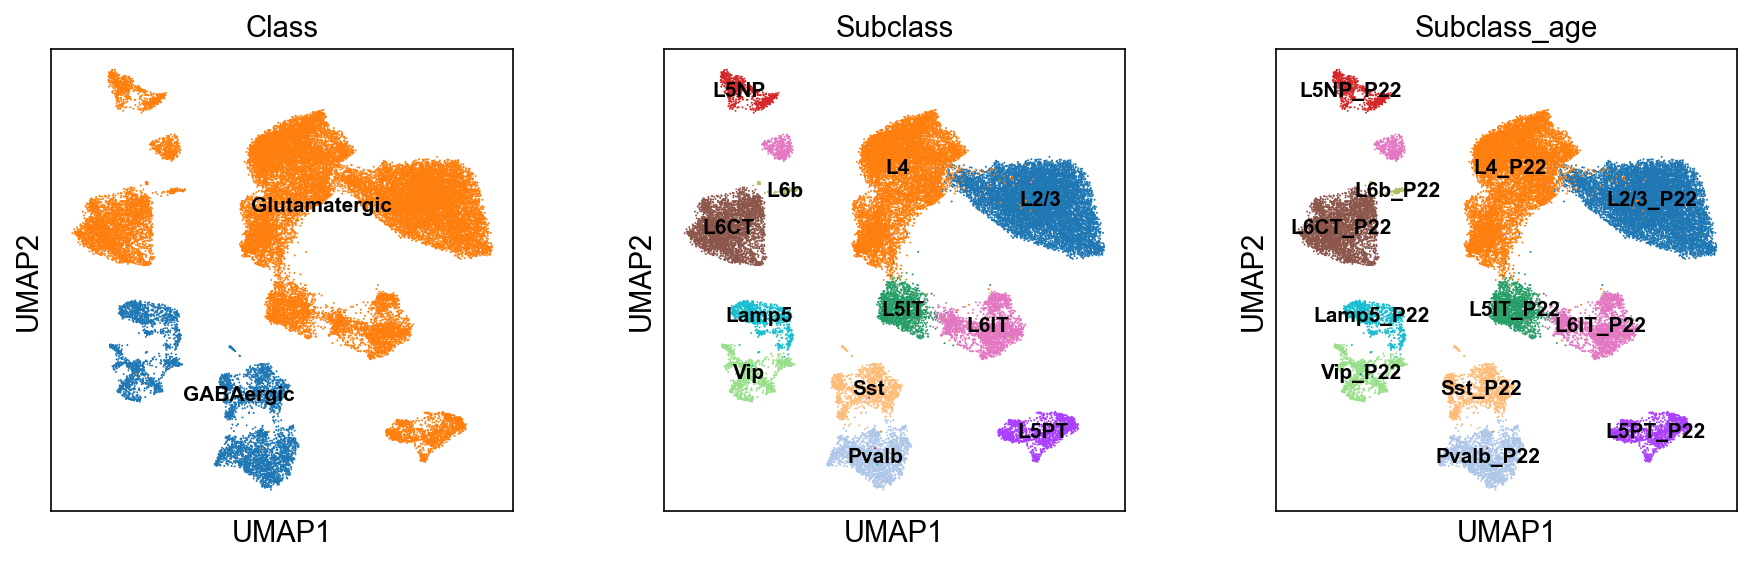

In [105]:
sc.pl.umap(WD1d, color=['Class', 'Subclass', 'Subclass_age'], legend_loc='on data', legend_fontsize=10)
sc.pl.umap(P22, color=['Class', 'Subclass', 'Subclass_age'], legend_loc='on data', legend_fontsize=10)

In [106]:
WD1d.shape

(19831, 21258)

In [8]:
WD1d_glut = WD1d[WD1d.obs.Class=='Glutamatergic',:]
WD1d_gaba = WD1d[WD1d.obs.Class=='GABAergic',:]

P22_glut = P22[P22.obs.Class=='Glutamatergic',:]
P22_gaba = P22[P22.obs.Class=='GABAergic',:]

gluta = WD1d_glut.concatenate(P22_glut, batch_categories=['P22-1dWD', 'P22'])
gaba = WD1d_gaba.concatenate(P22_gaba, batch_categories=['P22-1dWD', 'P22'])

/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [9]:
gluta.obs['Condition'] = gluta.obs['batch'] 
gaba.obs['Condition'] = gaba.obs['batch'] 


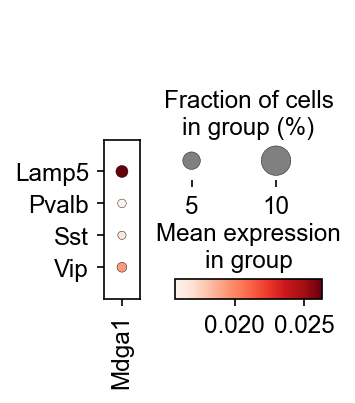

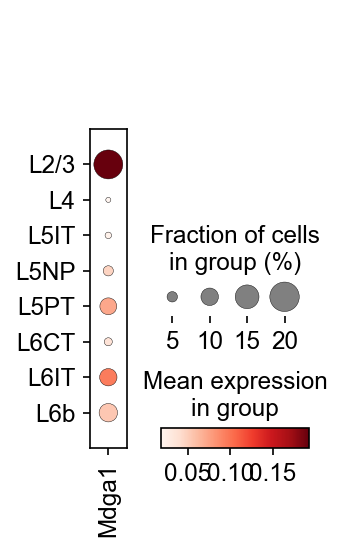

In [10]:
sc.pl.dotplot(gaba, 'Mdga1', groupby='Subclass') #makes everything categorical
sc.pl.dotplot(gluta, 'Mdga1', groupby='Subclass') #makes everything categorical

#have to remove a bunch of reses that have NaNs
del gluta.obs['leiden_0.25']
del gaba.obs['leiden_0.25']

In [ ]:
gluta.write_h5ad('h5ads/gluta_P22-1dWD+P22_DEready.h5ad')
gaba.write_h5ad('h5ads/gaba_P22-1dWD+P22_DEready.h5ad')

In [107]:
gluta = sc.read_h5ad('h5ads/gluta_P22-1dWD+P22_DEready.h5ad')
gaba = sc.read_h5ad('h5ads/gaba_P22-1dWD+P22_DEready.h5ad')

In [108]:
gluta = gluta[gluta.obs.Sample!='S3']
gluta = gluta[gluta.obs.Sample!='D3']
gluta = gluta[gluta.obs.Sample!='D2new']


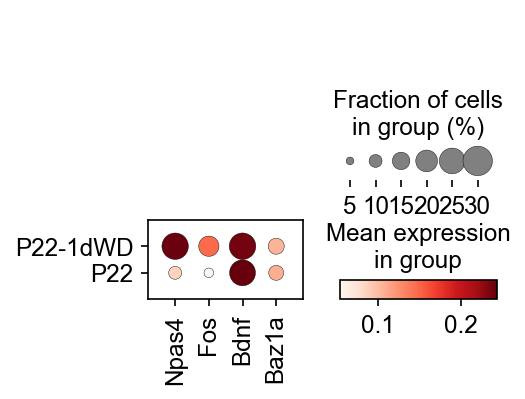

In [110]:
sc.pl.dotplot(gluta[gluta.obs.Subclass=='L2/3',:],['Npas4', 'Fos','Bdnf', 'Baz1a'], 'Condition')

In [111]:
gluta.obs.Subclass.value_counts()

L2/3    9431
L4      9052
L6CT    3231
L6IT    2547
L5IT    1591
L5PT    1301
L5NP     717
L6b      134
Name: Subclass, dtype: int64

In [112]:
gluta.obs.Type.value_counts()

L2/3_B       4532
L4_A         3890
L4_B         2808
L2/3_C       2587
L4_C         2354
L2/3_A       2312
L6CT_B       1749
L5IT         1577
L6IT_A       1197
L6CT_C       1045
L6IT_B        602
L5NP_A        447
L6IT_Car3     392
L5PT_A        380
L6CT_A        374
L6IT_C        370
L5PT_B        327
L5PT_C        240
L5NP_B        221
L6b           134
L5PT_D        117
L5PT_E        100
L5PT_F         81
L5PT_G         56
L5NP_C         49
L6CT_D         48
L6CT_E         15
Name: Type, dtype: int64

In [113]:
gaba.obs.Type.value_counts()

Pvalb_A    1120
Pvalb_B     826
Lamp5_A     757
Vip_A       497
Sst_A       418
Pvalb_D     404
Pvalb_C     367
Pvalb_E     348
Sst_B       333
Vip_B       326
Sst_C       308
Vip_C       244
Lamp5_B     229
Sst_D       222
Sst_E       215
Sst_F       175
Vip_D       164
Lamp5_C     151
Vip_E       150
Sst_G       145
Sst_H       143
Lamp5_D     122
Vip_F        77
Sst_I        76
Pvalb_F      46
Vip_G        43
Vip_H        36
Sst_J        35
Lamp5_E      33
Lamp5_F      29
Vip_I        26
Name: Type, dtype: int64

In [114]:
gaba.obs.Subclass.value_counts()

Pvalb    3111
Sst      2070
Vip      1563
Lamp5    1321
Name: Subclass, dtype: int64

## All subclasses

In [3]:
gluta = sc.read_h5ad('h5ads/gluta_P22-1dWD+P22_DEready.h5ad')
gaba = sc.read_h5ad('h5ads/gaba_P22-1dWD+P22_DEready.h5ad')

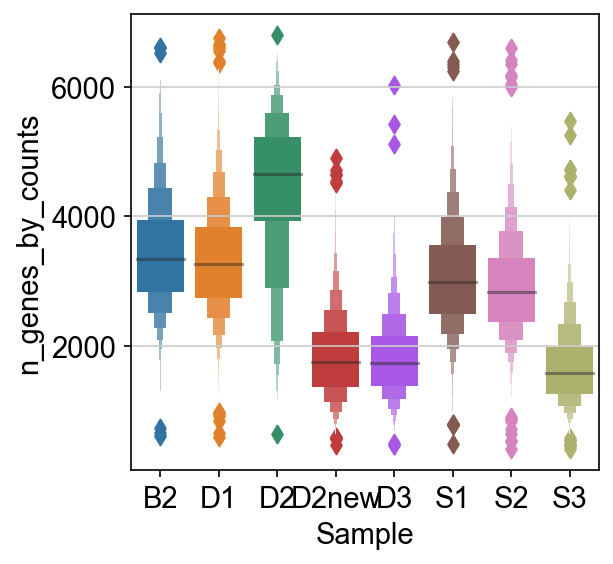

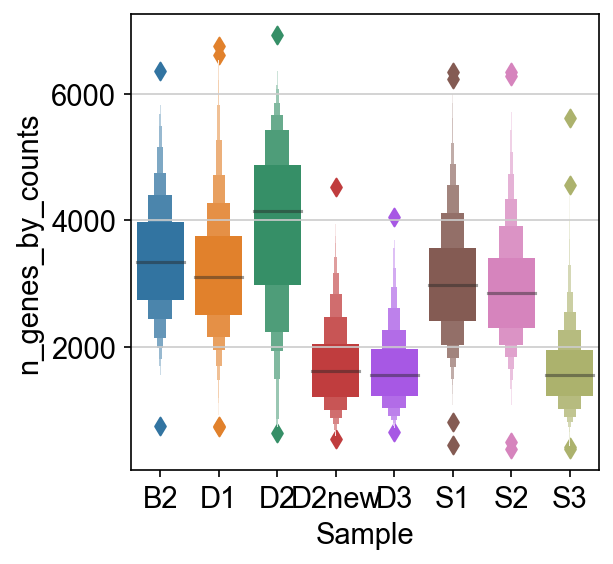

In [4]:
sn.boxenplot(data=gluta.obs, x='Sample', y='n_genes_by_counts')
plt.show()
sn.boxenplot(data=gaba.obs, x='Sample', y='n_genes_by_counts')

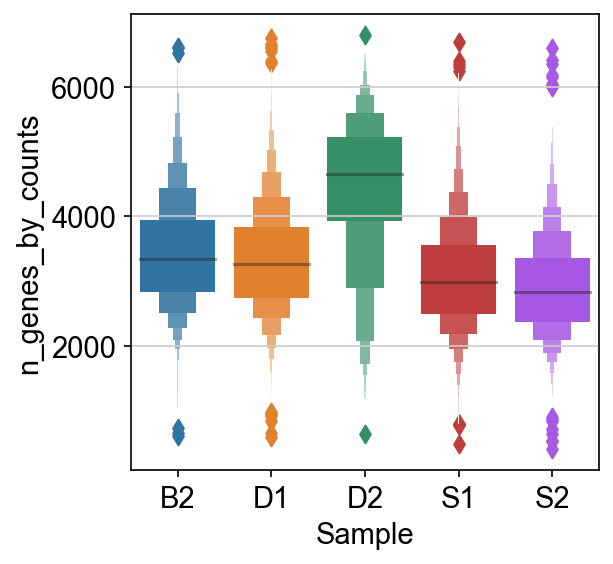

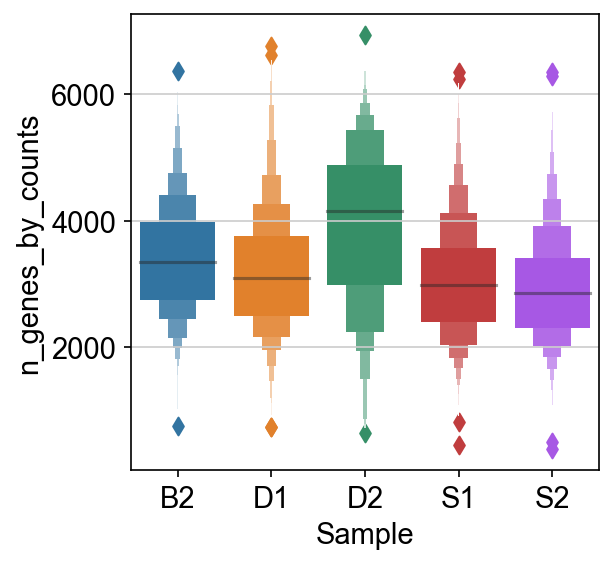

In [5]:
gluta = gluta[gluta.obs.Sample!='S3']
gaba = gaba[gaba.obs.Sample!='S3']

gluta = gluta[gluta.obs.Sample!='D3']
gaba = gaba[gaba.obs.Sample!='D3']

gluta = gluta[gluta.obs.Sample!='D2new']
gaba = gaba[gaba.obs.Sample!='D2new']

sn.boxenplot(data=gluta.obs, x='Sample', y='n_genes_by_counts')
plt.show()
sn.boxenplot(data=gaba.obs, x='Sample', y='n_genes_by_counts')

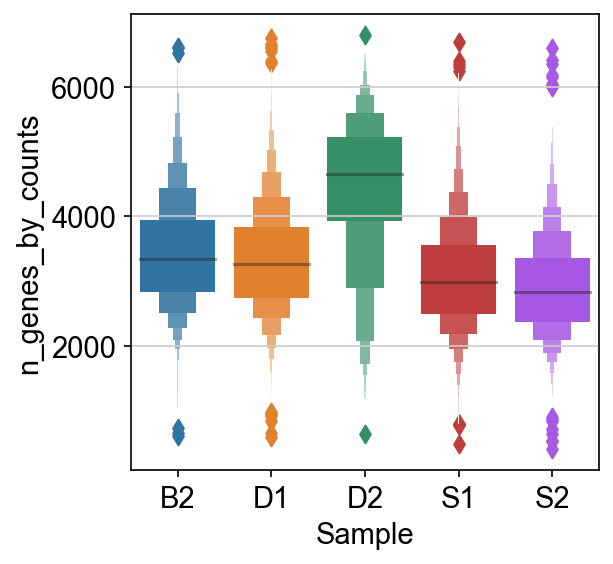

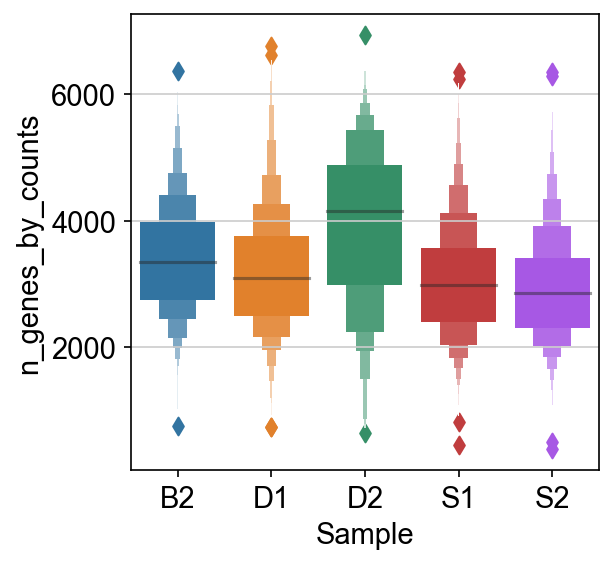

In [6]:
sn.boxenplot(data=gluta.obs, x='Sample', y='n_genes_by_counts')
plt.show()
sn.boxenplot(data=gaba.obs, x='Sample', y='n_genes_by_counts')

In [15]:
L23 = gluta[gluta.obs['Subclass']=='L2/3',:].copy()

type_age = []
for i in range(L23.shape[0]):
    type_age.append(L23.obs['Type'][i]+' '+ L23.obs['Condition'][i])
L23.obs['Type-Condition'] = pd.Categorical(type_age) 

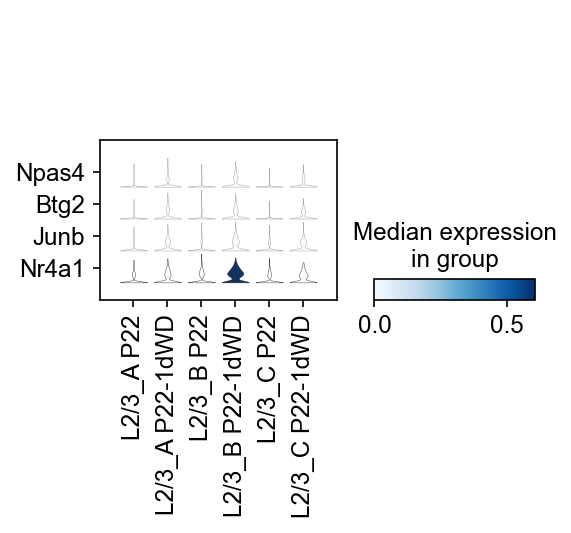

In [17]:
sc.pl.stacked_violin(L23, var_names=['Npas4', 'Btg2', 'Junb', 'Nr4a1'], groupby='Type-Condition', swap_axes=True)

In [37]:
gluta = gluta.copy()

In [38]:
gluta.X = gluta.raw.X

In [39]:
print(gluta.shape)
gluta = gluta[:,~gluta.var_names.str.startswith('Rp')].copy()
gluta = gluta[:,~gluta.var_names.str.startswith('mt')].copy()
gluta = gluta[:,~gluta.var_names.str.startswith('Gm')].copy()

print(gluta.shape)

(28004, 21258)
(28004, 17306)


In [40]:
gluta.raw = gluta

In [42]:
gluta.raw.X

<28004x17306 sparse matrix of type '<class 'numpy.float32'>'
	with 84090235 stored elements in Compressed Sparse Row format>

In [43]:
gaba = gaba.copy()
gaba.X = gaba.raw.X

In [44]:
print(gaba.shape)
gaba = gaba[:,~gaba.var_names.str.startswith('Rp')].copy()
gaba = gaba[:,~gaba.var_names.str.startswith('mt')].copy()
gaba = gaba[:,~gaba.var_names.str.startswith('Gm')].copy()

print(gaba.shape)

(5117, 21258)
(5117, 17306)


In [45]:
gaba.raw = gaba

In [46]:
gaba.raw.X

<5117x17306 sparse matrix of type '<class 'numpy.float32'>'
	with 15141721 stored elements in Compressed Sparse Row format>

In [47]:
gluta_dict_WD1d = dict()
for i in ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',]:
    df = DE(gluta[gluta.obs['Subclass']==i,:], obs_id='batch', 
                               obs_id_test='P22-1dWD', ref='rest', pts_thresh=0.2, lf_thresh=1)
    #df = df[df['LF']<4]
    gluta_dict_WD1d[i+'_WD1d'] = df[df['p_adj']<0.05]
    #gluta_dict_WD1d[i+'_WD1d'] = df

del df
gluta_dict_P22 = dict()
for i in ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',]:

    df = DE(gluta[gluta.obs['Subclass']==i,:], obs_id='batch', 
                              obs_id_test='P22', ref='rest', pts_thresh=0.2, lf_thresh=1)
    
    #df = df[df['LF']<4]
    gluta_dict_P22[i+'_P22'] = df[df['p_adj']<0.05]
    #gluta_dict_P22[i+'_P22'] = df

cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
32 154
54 65
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
1 944
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
116 196
205 207
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
4 664


In [48]:
gaba_dict_WD1d = dict()
for i in ['Pvalb', 'Sst', 'Vip', 'Lamp5']:
    df = DE(gaba[gaba.obs['Subclass']==i,:], obs_id='batch', 
                               obs_id_test='P22-1dWD', ref='rest', pts_thresh=0.2, lf_thresh=1)
    #df = df[df['LF']<4]
    gaba_dict_WD1d[i+'_WD1d'] = df[df['p_adj']<0.05]
    #gaba_dict_WD1d[i+'_WD1d'] = df
    
del df

gaba_dict_P22 = dict()
for i in ['Pvalb', 'Sst', 'Vip', 'Lamp5']:
    df = DE(gaba[gaba.obs['Subclass']==i,:], obs_id='batch', 
                              obs_id_test='P22', ref='rest', pts_thresh=0.2, lf_thresh=1)  
    #df = df[df['LF']<4]
    gaba_dict_P22[i+'_P22'] = df[df['p_adj']<0.05]
    #gaba_dict_P22[i+'_P22'] = df

cutoffs are good at 1.5 FC level
20 40
59 134
9 109
cutoffs are good at 1.5 FC level
121 128
120 144
88 130


In [11]:
gluta_dict_WD1d_15 = dict()
for i in ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',]:
    df = DE(gluta[gluta.obs['Subclass']==i,:], obs_id='batch', 
                               obs_id_test='P22-1dWD', ref='rest', pts_thresh=0.2, lf_thresh=0.6)
    #df = df[df['LF']<4]
    gluta_dict_WD1d_15[i+'_WD1d'] = df[df['p_adj']<0.05]
    #gluta_dict_WD1d_15[i+'_WD1d'] = df
    
gaba_dict_WD1d_15 = dict()
for i in ['Pvalb', 'Sst', 'Vip', 'Lamp5']:
    df = DE(gaba[gaba.obs['Subclass']==i,:], obs_id='batch', 
                               obs_id_test='P22-1dWD', ref='rest', pts_thresh=0.2, lf_thresh=0.6)
    #df = df[df['LF']<4]
    gaba_dict_WD1d_15[i+'_WD1d'] = df[df['p_adj']<0.05]
    #gaba_dict_WD1d_1.5[i+'_WD1d'] = df
    

cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
95 96
33 161
62 77
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
1 1019
cutoffs are good at 1.5 FC level
29 53
61 147
14 123


### Diagnose WD1d>P22 and P22>WD1d

If these plots all overlap, that means there's no subclass-specific bias driving any subclass-specific DE results below

In [49]:
def three_cdfs(dict_in,cond):  
    fig, axs = plt.subplots(1,3, figsize=(12,4))
    dict_in_sizes = []
    for i in dict_in.keys():
        dict_in_sizes.append(dict_in[i].shape[0])
        sn.kdeplot(dict_in[i][cond], label=i, cumulative=True, ax=axs[0])   
    axs[0].legend()
    axs[0].set_xlabel('Fraction of cells exp in '+cond)


    for i in dict_in.keys():
        sn.kdeplot(dict_in[i]['LF'], label=i, cumulative=True, ax=axs[1]) 
    axs[1].legend()
    axs[1].set_xlabel('log2FC in '+cond)


    for i in dict_in.keys():
        sn.kdeplot(dict_in[i]['p_adj'], label=i, cumulative=True, ax=axs[2])
    axs[2].legend()
    axs[2].set_xlabel('p_adj in '+cond)

    plt.tight_layout()

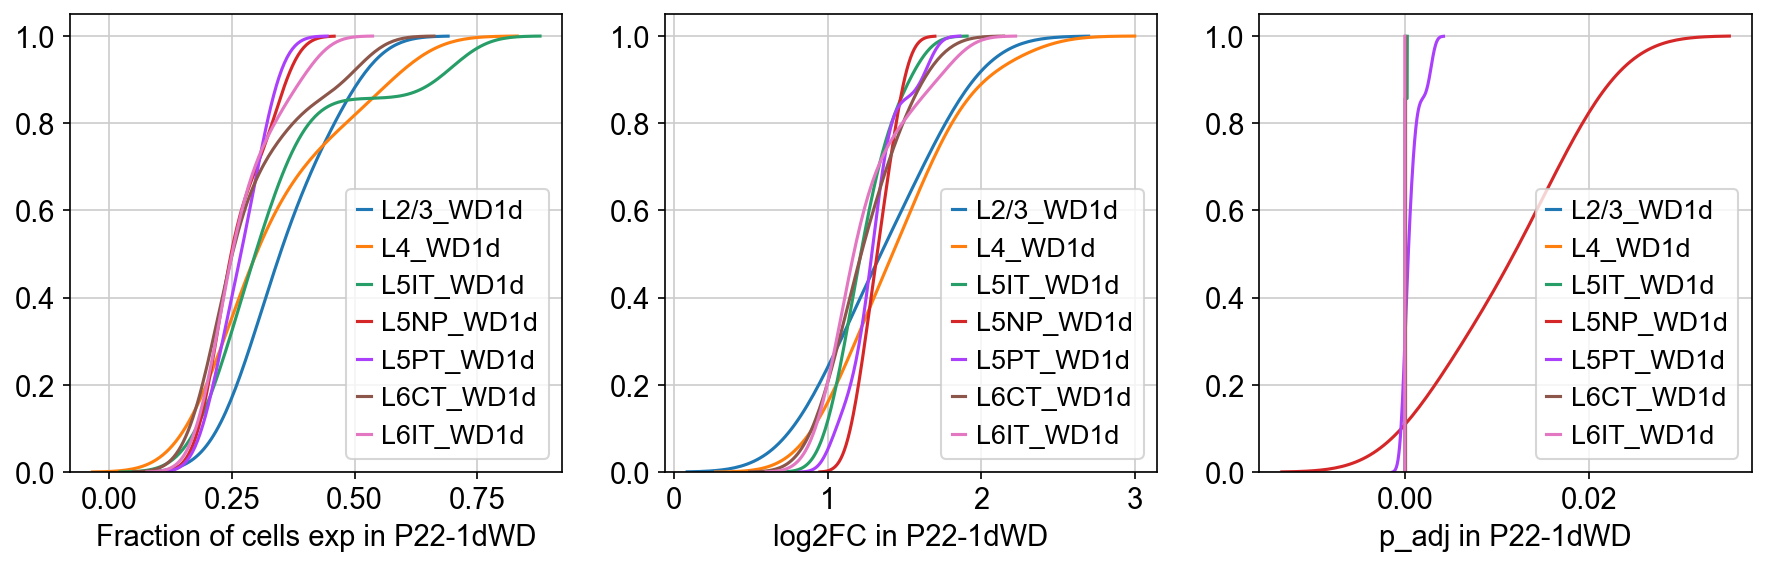

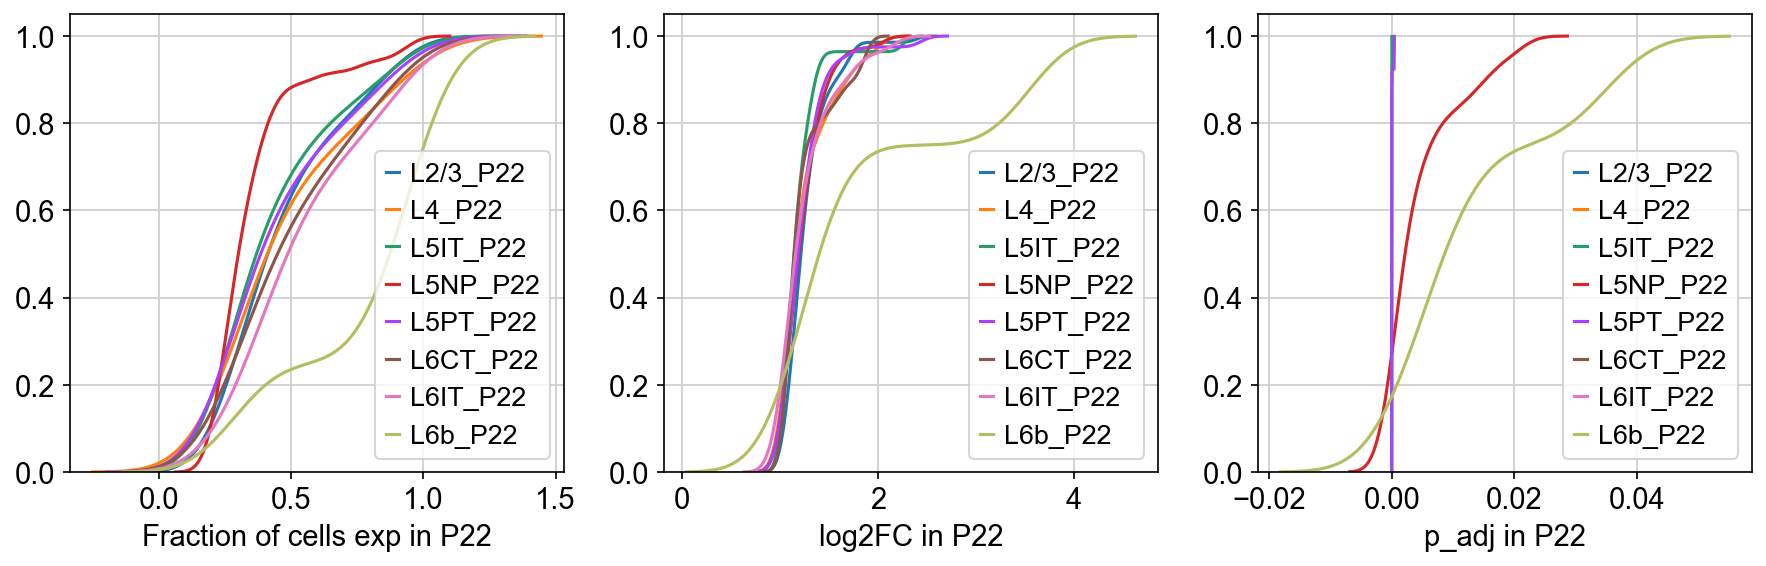

In [50]:
three_cdfs(dict_in=gluta_dict_WD1d, cond='P22-1dWD')
three_cdfs(dict_in=gluta_dict_P22, cond='P22')

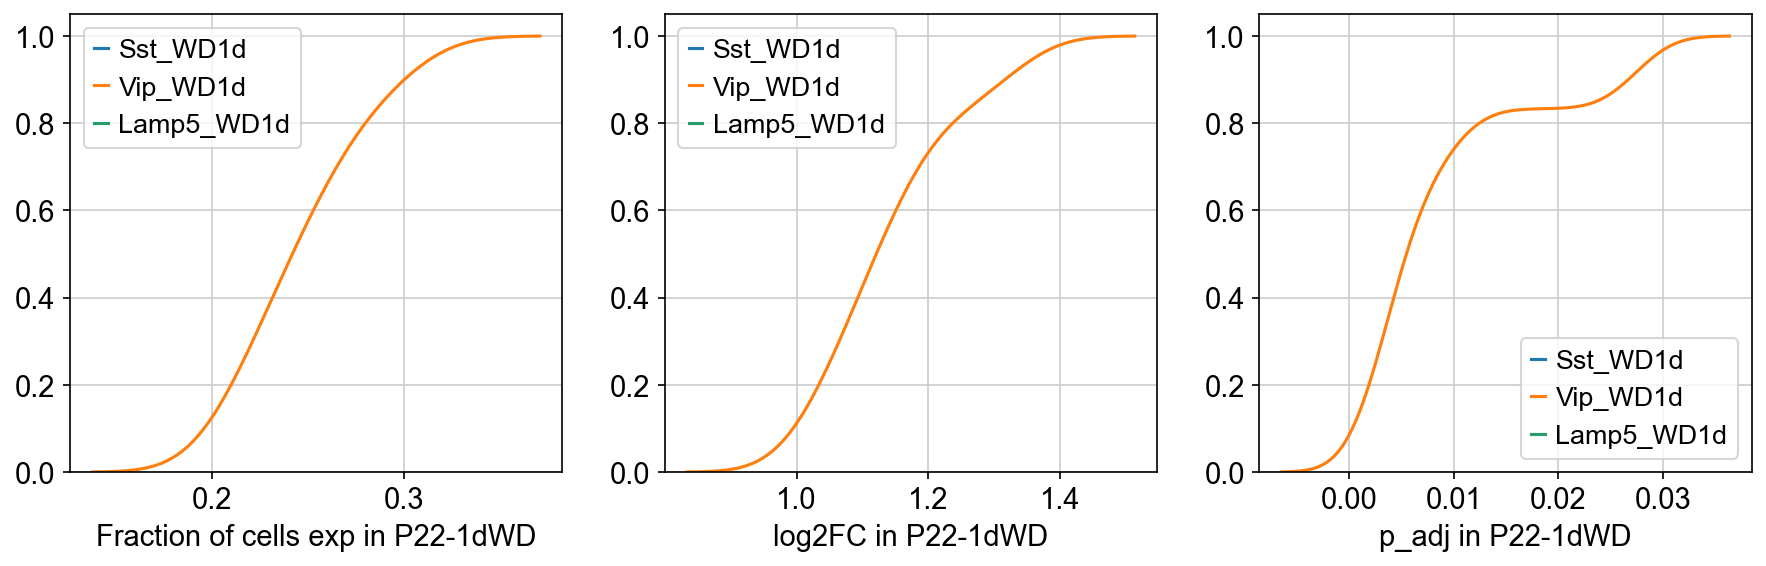

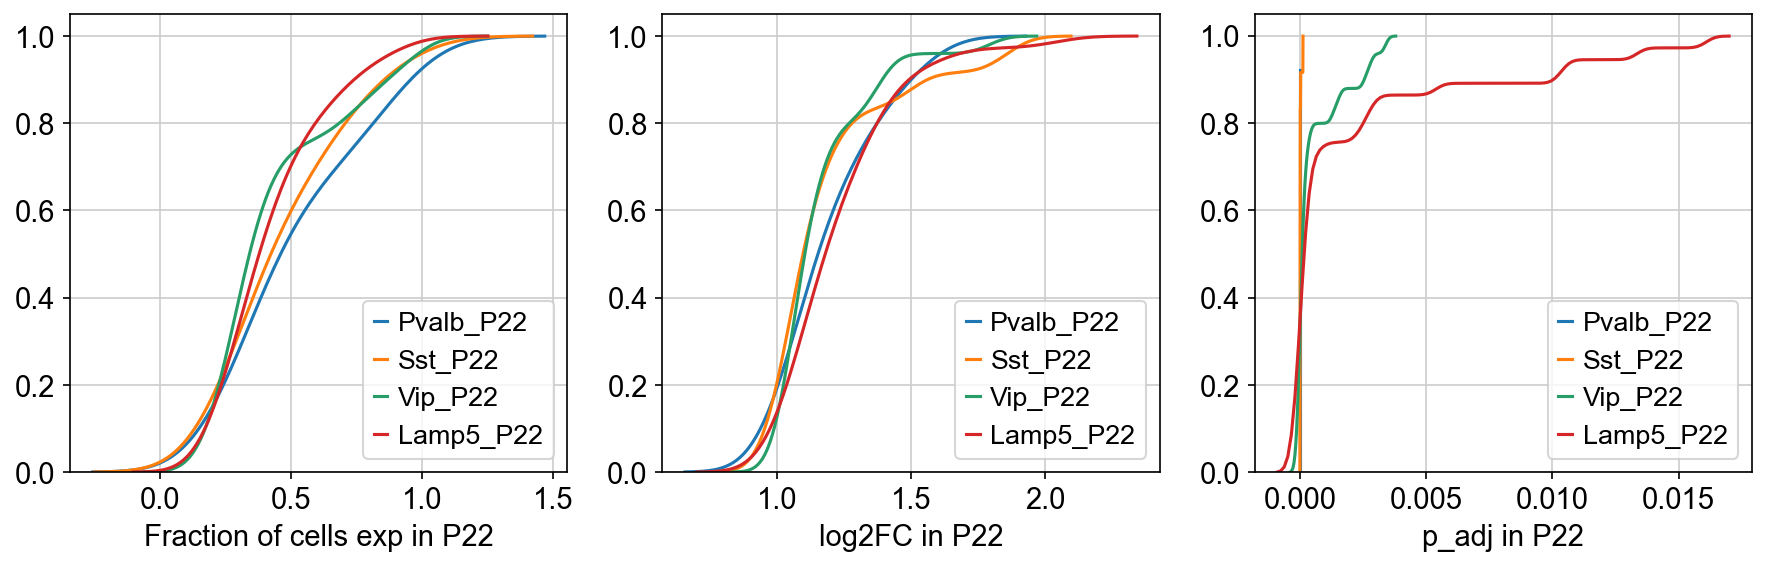

In [51]:
three_cdfs(dict_in=gaba_dict_WD1d, cond='P22-1dWD')
three_cdfs(dict_in=gaba_dict_P22, cond='P22')

In [52]:
gluta_dict_WD1d.keys()

dict_keys(['L2/3_WD1d', 'L4_WD1d', 'L5IT_WD1d', 'L5NP_WD1d', 'L5PT_WD1d', 'L6CT_WD1d', 'L6IT_WD1d', 'L6b_WD1d'])

In [53]:
for i in gluta_dict_WD1d:
    print(gluta_dict_WD1d[i].shape[0])

4
12
7
3
7
7
8
0


In [54]:
for i in gluta_dict_P22:
    print(gluta_dict_P22[i].shape[0])

70
19
28
36
40
29
25
4


### Overlap analysis WD1d>P22

In [55]:
import upsetplot
#from upsetplot import query, UpSet

In [56]:
glugab1d = gluta_dict_WD1d.copy()
glugab1d.update(gaba_dict_WD1d)

Text(0.5, 0.98, '1dWD>P22')

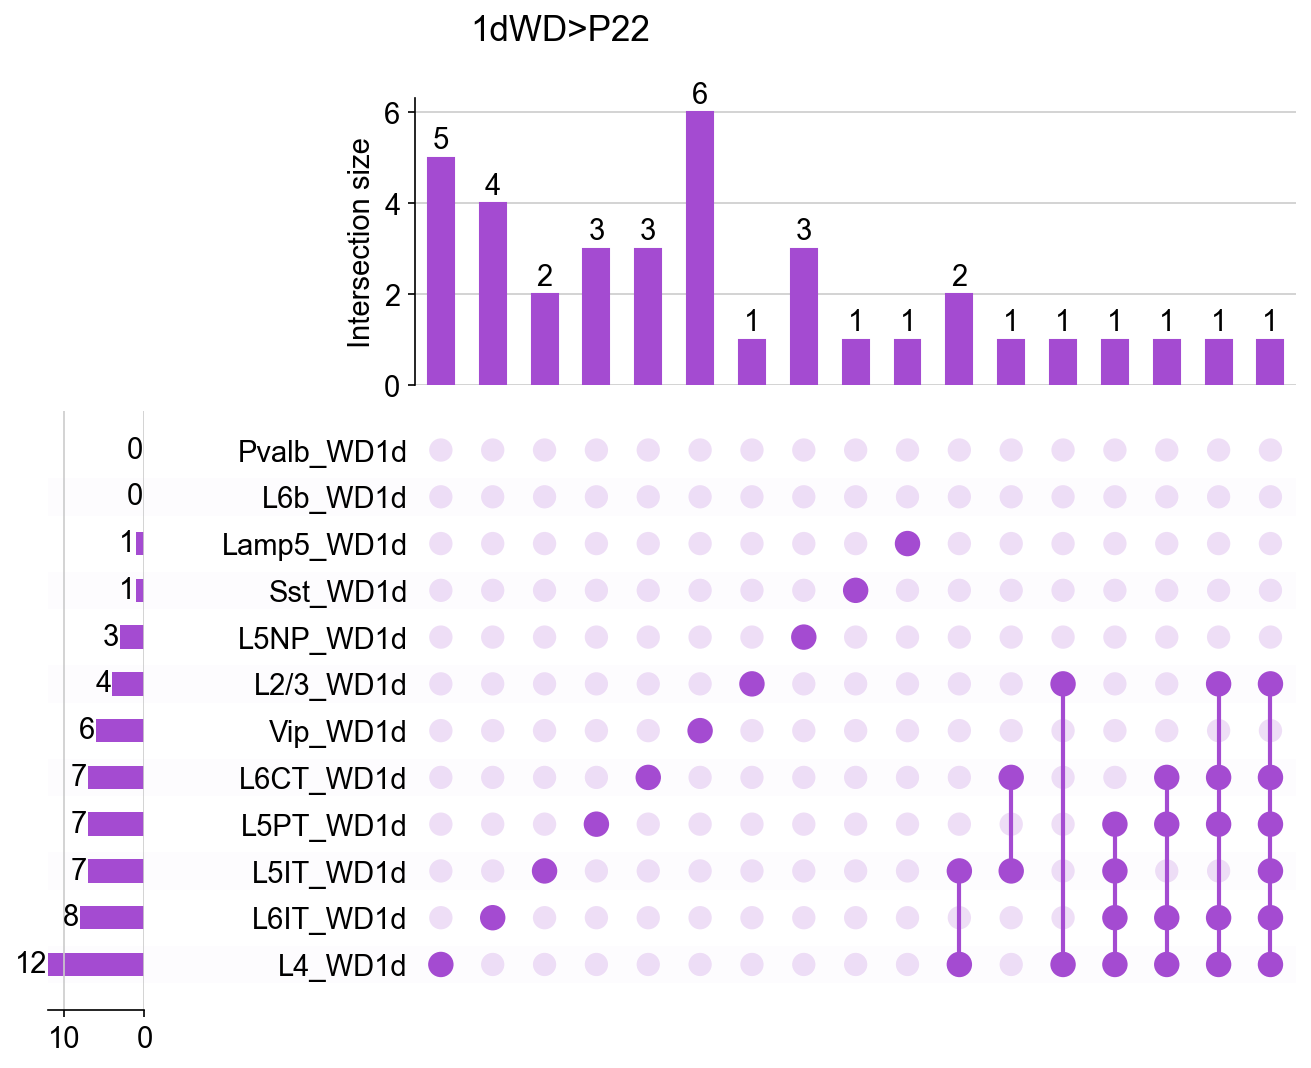

In [57]:
contents=dict()
for i in glugab1d:
    contents[i]=list(glugab1d[i].index)
a = upsetplot.from_contents(contents)
upsetplot.plot(a, sort_by='degree', show_counts=True,min_subset_size=1,
              facecolor='#A44BD1', shading_color=0.01,)
plt.suptitle('1dWD>P22')

In [133]:
IEGs = ['Arc', 'Arl4d', 'Arl5b', 'Bdnf', 'Cdc42ep3', 'Cdkn1a', 'Cited2', 'Crem', 'Dnajb1', 'Dnajb5', 'Dusp1', 'Dusp14', 'Dusp6', 'Egr1', 'Egr2', 'Egr4', 'Fbxo33', 'Fos', 'Fosb', 'Fosl2', 'Frmd6', 'Gadd45b', 'Gadd45g', 'Gm13889', 'Grasp', 'Homer1', 'Ifrd1', 'Irs2', 'Junb', 'Kdm7a', 'Mest', 'Midn', 'Nefm', 'Npas4', 'Nptx2', 'Nr4a1', 'Nr4a2', 'Nr4a3', 'Per1', 'Phf21b', 'Phlda1', 'Pim1', 'Pim3', 'Ptgs2', 'R3hdm1', 'Rheb', 'Sat1', 'Scg2', 'Spry2', 'Stk40', 'Tfrc', 'Tiparp', 'Tnfaip6', 'Vgf', 'Zdbf2', 'Camk1g', 'Cbln4', 'Gfod1', 'Klf10', 'Sertad1', 'Bhlhe40', 'Nab2', 'B930041F14Rik', 'Chuk', 'Cyp51', 'Drg1', 'Lrrk2', 'P4ha1', 'Scn3b', 'Snhg3', 'Trib1', 'Adrb1', 'Hivep3', 'Sgk1', 'Ankrd33b', 'Gadd45a', 'Ina', 'Nrn1', 'Htatsf1', 'Ube2g1', 'Crh', 'Fam214a', 'Gpd1', 'Gtf3c1', 'Keap1', 'Kras', 'Prpsap2', 'Rps29', 'Socs2', 'Tubb5', 'Vta1', 'C1qb', 'Cenpb', 'Csf1r', 'Gm28578', 'Hmces', 'Nrd1', 'Plp1', 'Plpp4', 'Prrc2a', 'Ssh1', '1190002N15Rik', 'Acsl4', 'Adal', 'Ccnt1', 'Chrac1', 'Cpne8', 'Dlx2', 'Fam150b', 'Fam46a', 'Glul', 'Gpt2', 'Kctd12', 'Noct', 'Ntrk3', 'Paqr8', 'Pcnp', 'Prickle2', 'Snd1', 'Sox2', 'Tcof1', 'Wbp5', 'Zkscan1', 'Zmiz2', 'Alcam', 'Cpeb1', 'Lig3', 'Syt4', 'Timp2', 'Ubfd1', 'Ctsb', 'Elavl4', 'Serpini1', 'Snx19', 'Usp1', 'Arrdc3', 'Hspa1b', 'Hspa5', 'Mt1', 'Ndufv1', 'Trmt44', 'Hspa1a', 'Mt2', 'Acad12', 'Ppfia1', 'Cdr2', 'Pex11b', 'Ppnr', 'Ssfa2', 'Avl9', 'Ctnnd2', 'Hsph1', 'Slc1a2', 'Ten1', 'Pou3f1', 'Adamts13', 'Bambi', 'Ccnl1', 'Cebpb', 'Coq10b', 'Cyr61', 'Dclk1', 'Dio2', 'Emd', 'Eprs', 'Gem', 'Gm3764', 'Gstm3', 'Hes5', 'Klf4', 'Ptp4a1', 'Rgs2', 'Tsc22d3', 'Ubc', 'Usp2', 'Usp53', 'Wdr31', '1810011O10Rik', 'Acta1', 'Actb', 'Actg1', 'Adamts1', 'Akap12', 'Apold1', 'Atf3', 'Atf4', 'Azin1', 'Bcl6b', 'Cd83', 'Clec14a', 'Clec2d', 'Clic4', 'Cnn2', 'Csrnp1', 'Ctgf', 'Dlc1', 'Dnaja1', 'Dusp8', 'Epha2', 'Fermt2', 'Gpx1', 'Hsp90aa1', 'Hsp90ab1', 'Hspa8', 'Hspb1', 'Ism1', 'Jund', 'Klf2', 'Maff', 'Mafk', 'Myadm', 'Nes', 'Picalm', 'Plaur', 'Pnkd', 'Ptpn12', 'Rassf1', 'Serpinh1', 'Skil', 'Srf', 'Swap70', 'Timp3', 'Tinagl1', 'Tnfrsf12a', 'Tpm4', 'Tril', 'Tuba1c', 'Vasp', 'Vcl', 'Wdr1', 'Zyx', 'Ankrd37', 'Dcaf7', 'Fibp', 'Mal', 'Mbp', 'Myl12a', 'Nedd9', 'Pak1ip1', 'Zfp36', '2210016L21Rik', 'Adamts10', 'Ajuba', 'Ano6', 'Atraid', 'Bcl2l2', 'Cflar', 'Chordc1', 'Cldn5', 'Clu', 'Commd7', 'Crispld2', 'Cspg4', 'Cttnbp2nl', 'Dbi', 'Dbp', 'Elp2', 'Emp1', 'Enc1', 'Enpp2', 'Fam76b', 'Gpcpd1', 'Gstm5', 'Hopx', 'Hs3st1', 'Igfbp2', 'Iigp1', 'Ing3', 'Irgm2', 'Jkamp', 'Klf6', 'Klhl22', 'Lin52', 'Litaf', 'Lpar1', 'Lrrfip1', 'Manba', 'Mecom', 'Med10', 'Mrgbp', 'Mrpl35', 'Nov', 'Pdlim5', 'Plxna2', 'Ppdpf', 'Prdx2', 'Prickle1', 'Psmd5', 'Pxdc1', 'Rbm18', 'Rnd1', 'Sdhaf4', 'Slc1a3', 'Slc20a1', 'Slc25a25', 'Snx18', 'Sox4', 'Specc1l', 'St5', 'Stc1', 'Thsd1', 'Thsd4', 'Tmem252', 'Tpgs1', 'Trpc4', 'Ubald1', 'Ypel3', 'Zc3h7a', 'Aatk', 'Anp32e', 'Auts2', 'Bok', 'Bri3', 'C130074G19Rik', 'Cacul1', 'Cacybp', 'Ccnd2', 'Ceacam1', 'Crebrf', 'Crk', 'D030056L22Rik', 'Dctn1', 'Dhx8', 'Efna1', 'Fam107a', 'Hbp1', 'Hdac7', 'Ifnar2', 'Irf2bp2', 'Kcne4', 'Kif26a', 'Klf7', 'Klhl2', 'Lage3', 'Mapk3', 'Mat2a', 'Ndnf', 'Nrep', 'Paxip1', 'Phactr4', 'Rbm7', 'Rgcc', 'Rpl36al', 'S1pr1', 'Sema3g', 'Sfpq', 'Sirt2', 'Slc38a5', 'Smtn', 'Tmem242', 'Tpra1', 'Trim16', 'Tshz2', 'Txndc16', 'Zfp644', 'Ccl3', 'Ccl4', 'Ssb', 'Abhd6', 'Acss1', 'Agfg1', 'Apobec1', 'Atp13a2', 'Btg2', 'C5ar1', 'Ccdc117', 'Ccl2', 'Ccl7', 'Cracr2b', 'Ets2', 'Fech', 'Fkbp4', 'Fkbp5', 'Ftl1', 'Fxr1', 'Got1', 'Gpr157', 'Hacd3', 'Id2', 'Irf4', 'Jdp2', 'Kpna4', 'Lyve1', 'Magoh', 'Map2k7', 'Marcksl1', 'Mbtps2', 'Mob4', 'Pou2f2', 'Rnf215', 'Sdccag3', 'Selk', 'Sesn1', 'Slc15a3', 'Snap23', 'Srp54b', 'Tbc1d10a', 'Trim44', 'Vcam1', 'Ywhah', 'Zfp326', 'Anp32a', 'Atp5g2', 'Bpnt1', 'Cldn11', 'D10Jhu81e', 'Ephx3', 'Fam107b', 'Gprc5c', 'H1f0', 'Hcfc1', 'Lbh', 'Meg3', 'Nisch', 'Nodal', 'Nrgn', 'Odc1', 'Pde4b', 'Pvr', 'Sec24d', 'Slc35a5', 'Stard8', 'Tgfbi', 'B230216N24Rik', 'Cbln2', 'Dot1l', 'Egln1', 'Etv5', 'Fam19a1', 'Fmnl1', 'Hsd17b12', 'Inhba', 'Mapk4', 'Nefl', 'Nhp2l1', 'Ntrk2', 'Penk', 'Ppme1', 'Rasl10a', 'Sgsm1', 'Tpt1', 'Tsnax', 'Pde10a', 'Prkg2', 'Rnd3', 'Ier5', 'Atxn1', 'Hrh3', 'Iqgap2', 'Pcgf2', 'Pdlim1', 'Sh2d3c', 'Car12', 'Mapk6', 'Nrp1', 'Rcan2', 'Rprm', 'Tpbg', 'Ccnc', 'Eno1', 'H2-Q4', 'Igf1', 'Igfbp5', 'Pam', 'Serpine2', 'Syn2', 'Usp32', 'Fam76a', 'Isy1', '2210016F16Rik', 'Ankrd46', 'Arih1', 'Baiap2', 'Bex1', 'Cdk5r1', 'Cenpa', 'Crhbp', 'Dnajb14', 'Eef1e1', 'Elovl4', 'Gabra4', 'Gabrb1', 'Gars', 'Gphn', 'Grm1', 'Hcn1', 'Hunk', 'Itgav', 'Jarid2', 'Mdm2', 'Mknk1', 'Npy', 'Osbpl3', 'Pcdh17', 'Pwp1', 'Rap1a', 'Rusc1', 'Sccpdh', 'Tmtc4', 'Ubxn2b', 'Uckl1', 'Copb2', 'Cxcl14', 'Nlk', 'Pou3f3', 'Strn4', 'Tbc1d10b', 'Chp1', 'Col14a1', 'Lgi1', 'Llph', 'Ngef', 'Plppr4', 'Sept6', 'Nkain3', 'Tra2a', 'U2af2', 'Erf', 'S1pr2', 'Lypla2', 'Mvk', 'Rfx4', 'Angpt2', 'Anxa2', 'Atp1a2', 'Ccnd1', 'Mall', 'Sept4', 'Tuba1a', 'Msn', 'Adgrg1', 'Anxa3', 'Arpc1b', 'Atp5o', 'Bmp2', 'Cap2', 'Cast', 'Cdk17', 'Cmip', 'Csgalnact2', 'Ergic1', 'Fam114a1', 'Gkn3', 'H2afv', 'Lama4', 'Lox', 'Ltn1', 'Mpp5', 'Mxra8', 'Ntn4', 'Ptgds', 'Ptpn9', 'Ret', 'Rps26', 'Slc10a7', 'Slc12a2', 'Spag9', 'Thbd', 'Thbs1', 'Tk2', 'Tmtc1', 'Ackr3', 'Aldh2', 'Cpm', 'Ctla2b', 'Ddc', 'Fyn', 'Gnb2l1', 'Grb14', 'Gsk3b', 'Mga', 'Plcl1', 'Pls3', 'Rad54l2', 'Rnase4', 'Rps28', 'Sort1', 'Tmem229b', 'Zdhhc4', 'Nfxl1', 'Tmem106b', 'Ube2g2', 'Arap2', 'Ccl9', 'Ctla2a', 'Ddx26b', 'Letmd1', 'Man2a1', 'Mfsd7b', 'Pid1', 'Rps6ka3', 'Slc25a36', 'Tank', 'Zfand3', 'Abhd14b', 'Adcyap1r1', 'C1qtnf2', 'Cacna1h', 'Ccdc80', 'Dcbld2', 'Eps8', 'Krtcap2', 'Mib1', 'Ptk7', 'Rtn1', 'Smpdl3a', 'Snhg11', 'Spp1', 'Tmem9b', 'Tpm2', 'Uba5']

In [17]:
'Baz1a' in IEGs

False

L2/3_WD1d


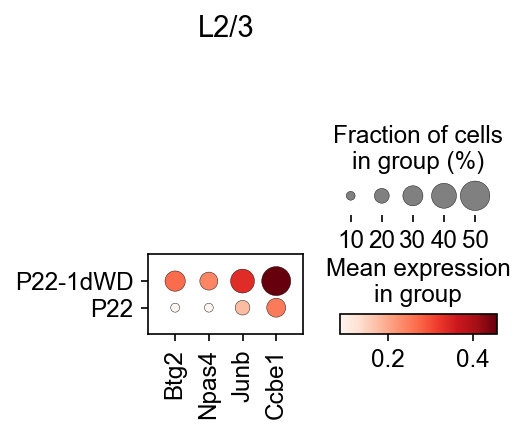

L4_WD1d


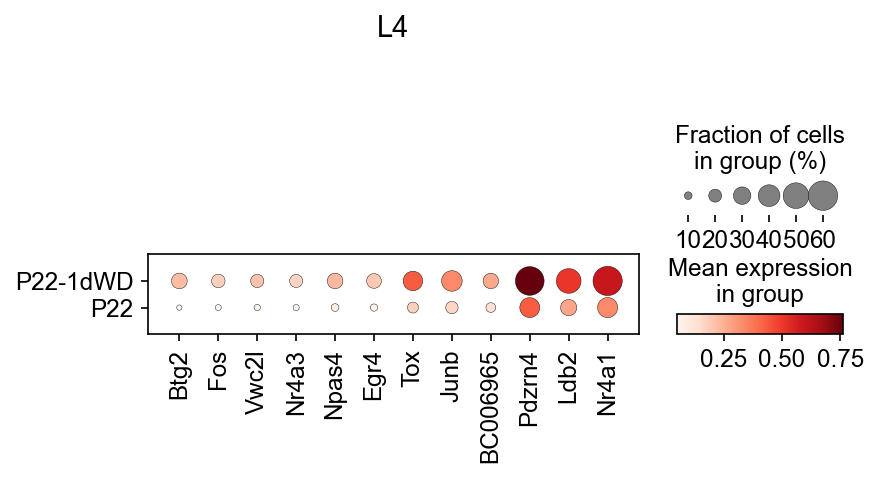

L5IT_WD1d


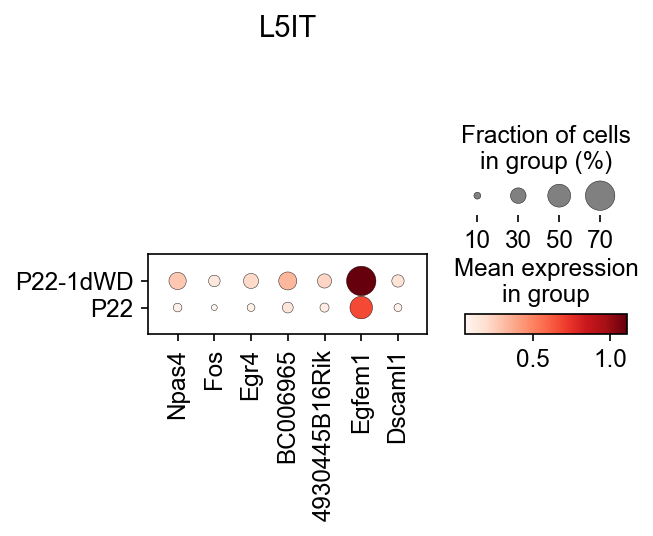

L5NP_WD1d


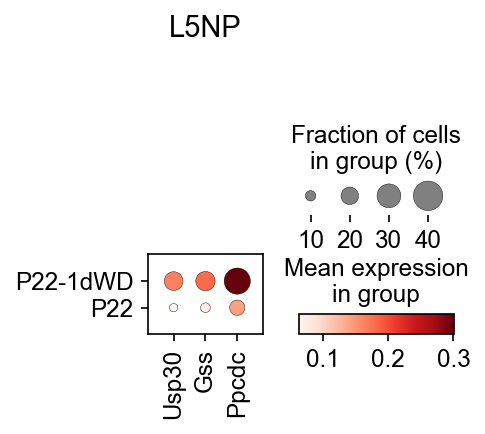

L5PT_WD1d


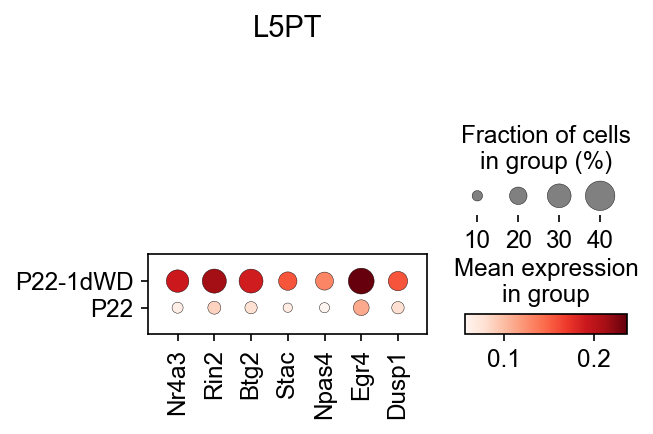

L6CT_WD1d


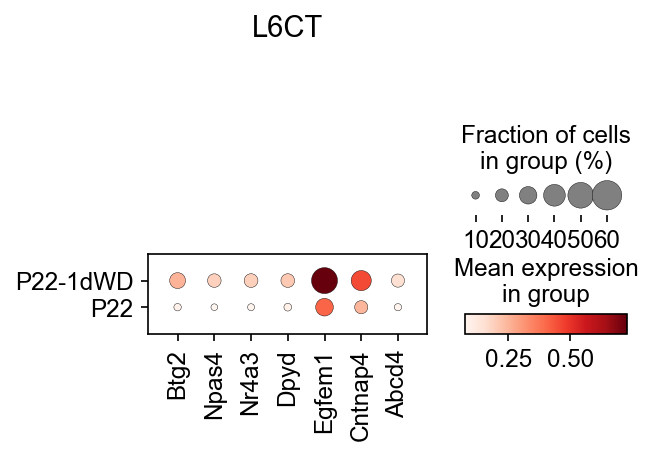

L6IT_WD1d


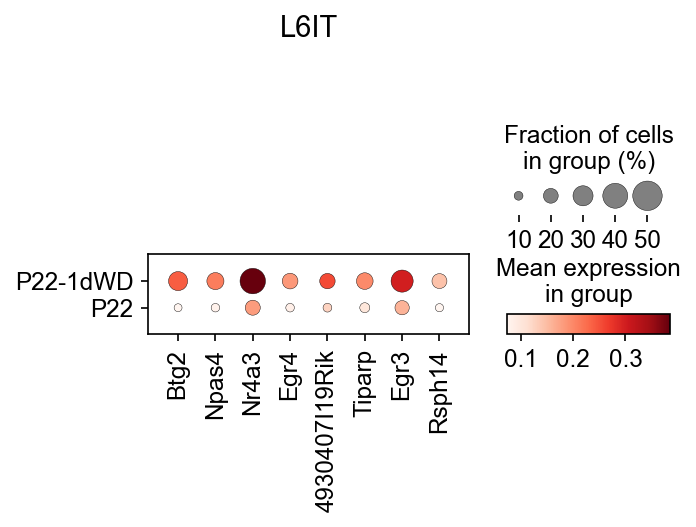

L6b_WD1d


ValueError: left cannot be >= right

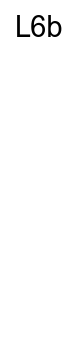

In [58]:
for i in gluta_dict_WD1d:
    if (i.split('_')[0]=='L2/3'):
        print(i)
        gs = list(gluta_dict_WD1d[i].index)
        sc.pl.dotplot(gluta[gluta.obs.Subclass==i.split('_')[0],:], gs, 'Condition', title=i.split('_')[0], save='1d>22_L23'+'.pdf')
    else:
        print(i)
        gs = list(gluta_dict_WD1d[i].index)
        sc.pl.dotplot(gluta[gluta.obs.Subclass==i.split('_')[0],:], gs, 'Condition',title=i.split('_')[0], save='1d>22_'+i.split('_')[0]+'.pdf')

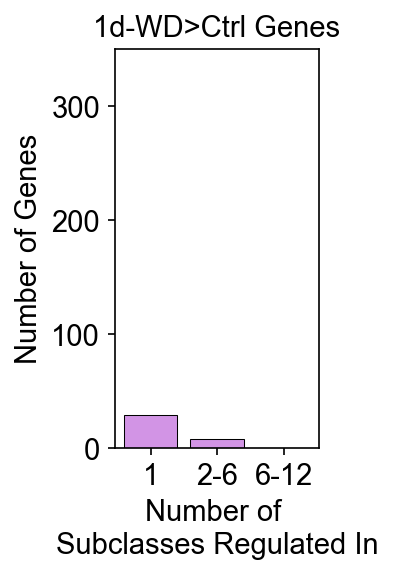

In [59]:
singular = []
medium = []
shared = []
for i in range(a.shape[0]):
    bool_array = a.iloc[i,:].name #bool for each subclass a gene is DE in. True
    gene_name = a.iloc[i,:].values[0]
    num_true = bool_array.count(True)
    if (num_true==1):
        singular.append(gene_name)
    elif (num_true in (2,3,4,5,6,)):
        medium.append(gene_name)
    else:
        shared.append(gene_name)

plt.figure(figsize=(1.75,3.5))
plt.bar(['1',
        '2-6', '6-12', ], [len(singular),len(medium), len(shared), ],
       color='#D294E5', linewidth=0.5, edgecolor='black')
plt.ylabel('Number of Genes')
plt.title('1d-WD>Ctrl Genes')
plt.xlabel('Number of \nSubclasses Regulated In')
plt.grid(False)
plt.ylim([0,350])
plt.savefig('figures/1dWD>Ctrl_barplot.pdf', bbox_inches='tight')

#### Gene expression

In [42]:
i

'Lamp5_WD1d'

/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


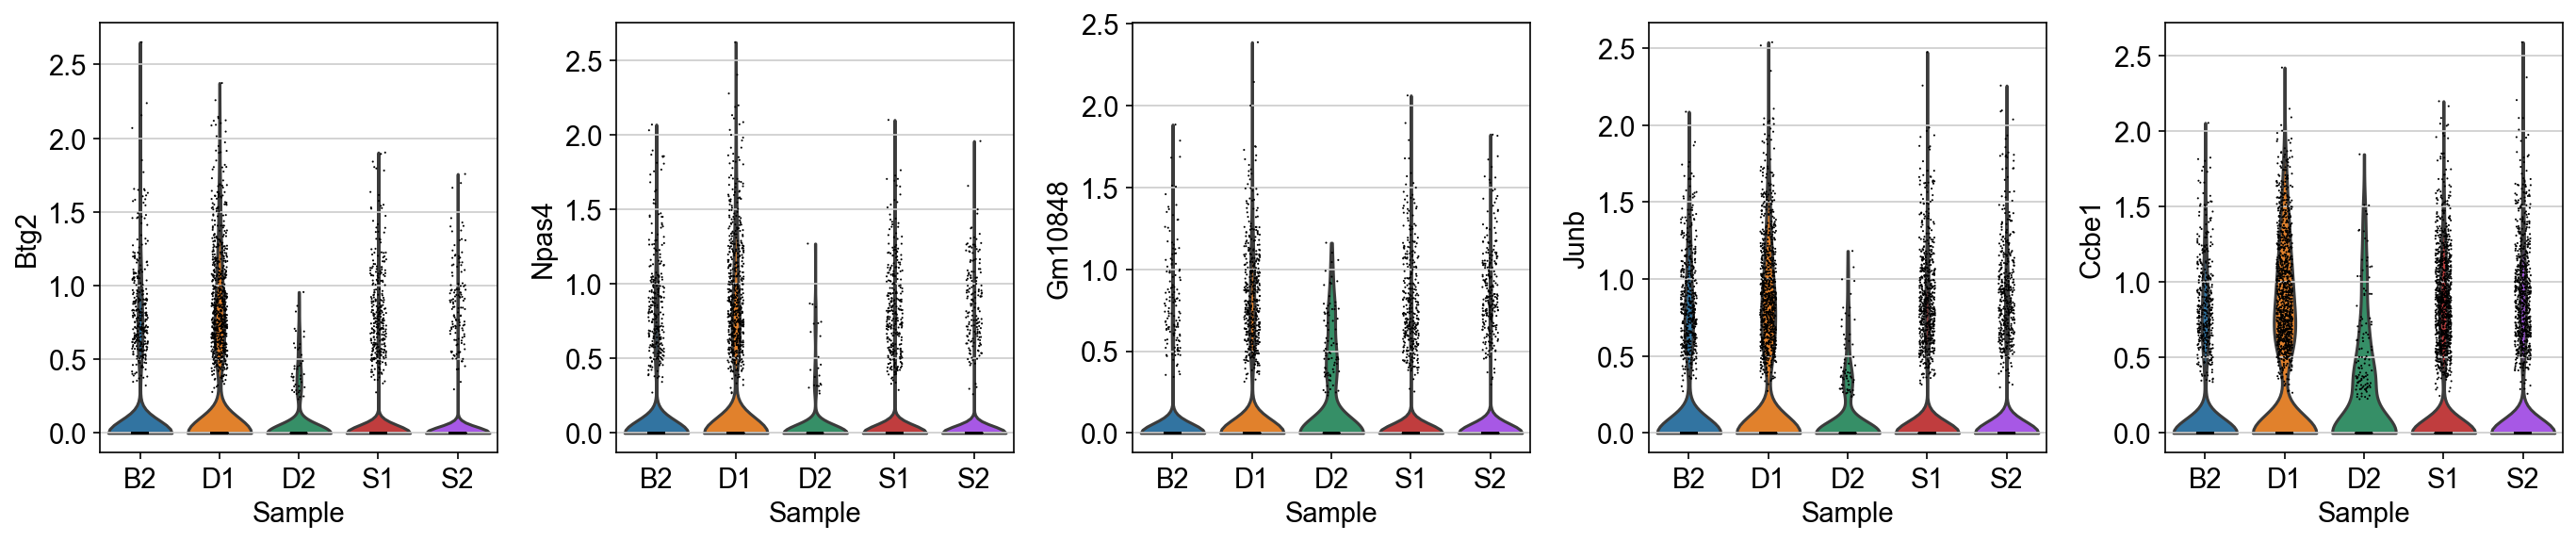

In [52]:
sc.pl.violin(gluta[gluta.obs.Subclass=='L2/3',:], gluta_dict_WD1d['L2/3_WD1d'].index, 'Sample')

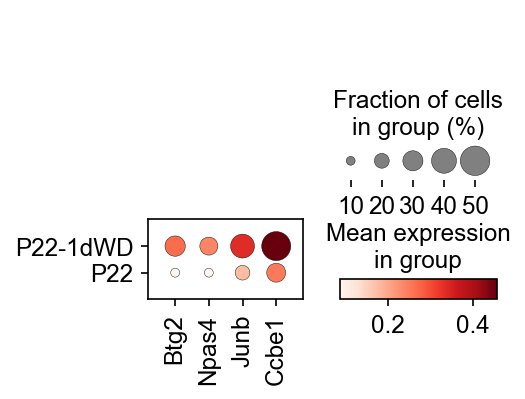

In [60]:
sc.pl.dotplot(gluta[gluta.obs.Subclass=='L2/3',:], gluta_dict_WD1d['L2/3_WD1d'].index, 'Condition')

L2/3_WD1d


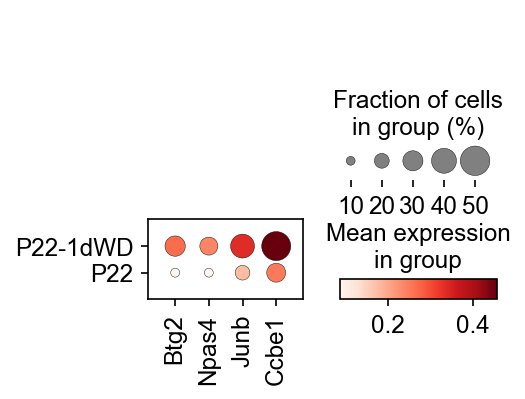

L4_WD1d


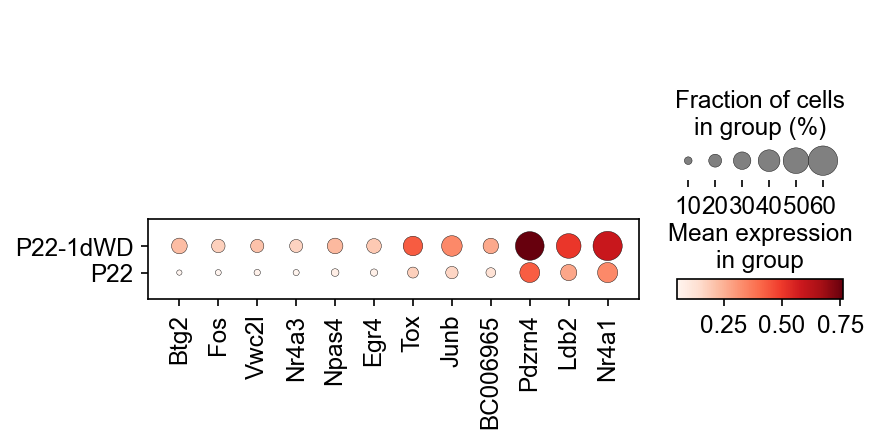

L5IT_WD1d


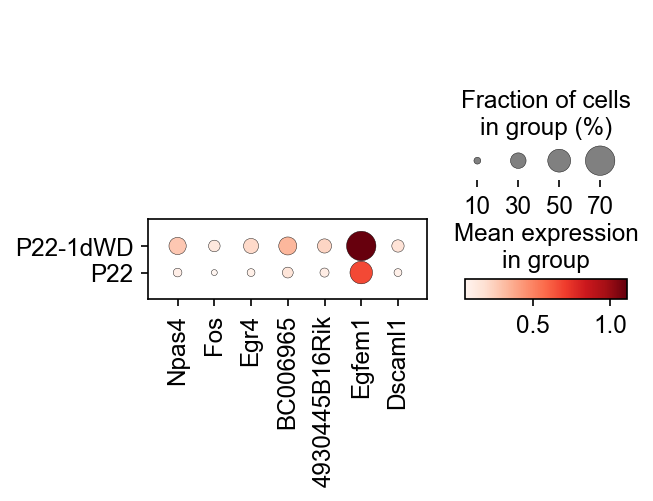

L5NP_WD1d


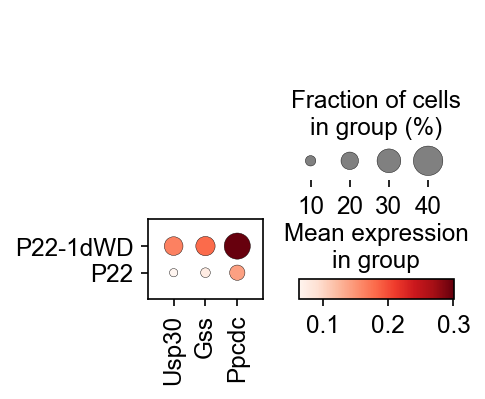

L5PT_WD1d


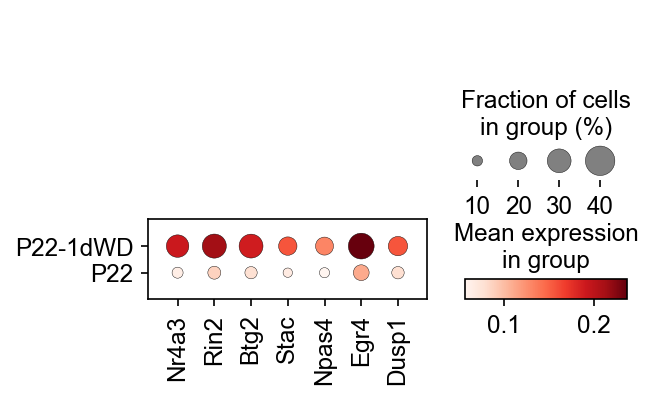

L6CT_WD1d


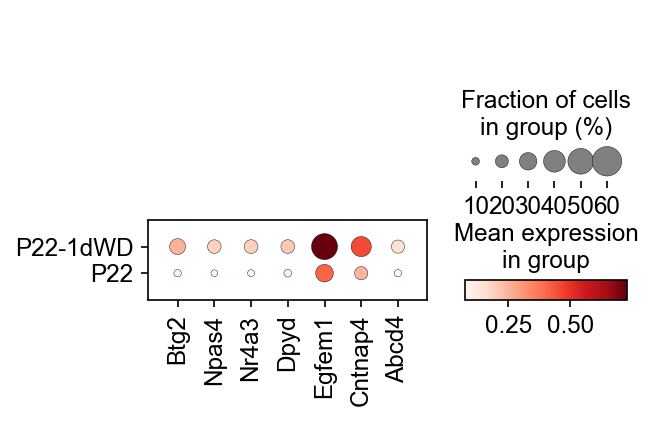

L6IT_WD1d


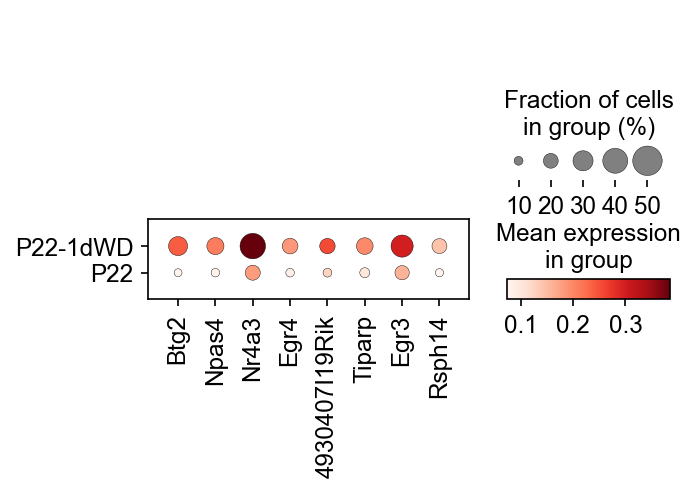

L6b_WD1d


ValueError: left cannot be >= right

<Figure size 112.5x187.5 with 0 Axes>

In [61]:
for i in gluta_dict_WD1d:
    print(i)
    sc.pl.dotplot(gluta[gluta.obs.Subclass==i.split('_')[0],:], gluta_dict_WD1d[i].index, 'Condition')

Sst_WD1d


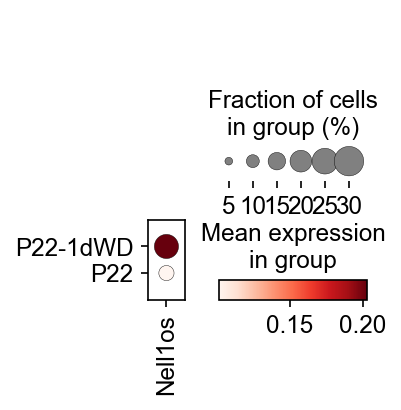

Vip_WD1d


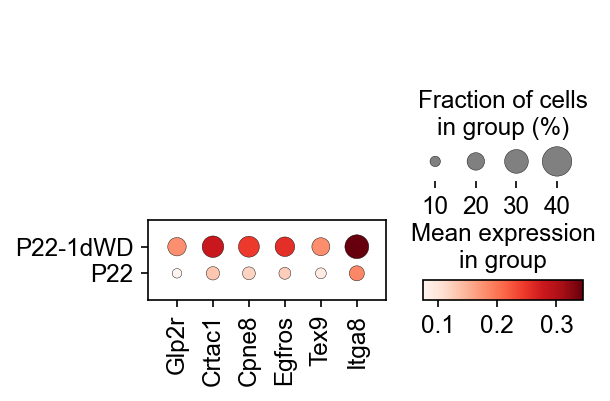

Lamp5_WD1d


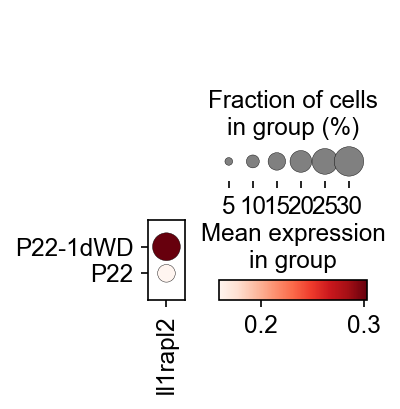

In [62]:
for i in ['Sst_WD1d','Vip_WD1d','Lamp5_WD1d']:
    print(i)
    sc.pl.dotplot(gaba[gaba.obs.Subclass==i.split('_')[0],:], gaba_dict_WD1d[i].index, 'Condition')

### Overlap analysis P22>WD1d

In [63]:
gluta_dict_P22.update(gaba_dict_P22)

In [68]:
glugab22 = gluta_dict_P22.copy()
glugab22.update(gaba_dict_P22)

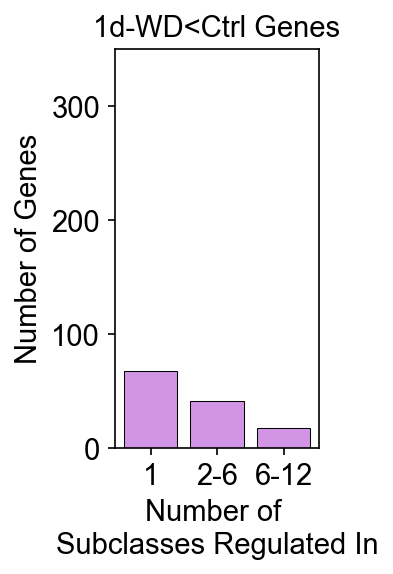

In [65]:
singular = []
medium = []
shared = []
for i in range(a.shape[0]):
    bool_array = a.iloc[i,:].name #bool for each subclass a gene is DE in. True
    gene_name = a.iloc[i,:].values[0]
    num_true = bool_array.count(True)
    if (num_true==1):
        singular.append(gene_name)
    elif (num_true in (2,3,4,5,6,)):
        medium.append(gene_name)
    else:
        shared.append(gene_name)

plt.figure(figsize=(1.75,3.5))
plt.bar(['1',
        '2-6', '6-12', ], [len(singular),len(medium), len(shared), ],
       color='#D294E5', linewidth=0.5, edgecolor='black')
plt.ylabel('Number of Genes')
plt.title('1d-WD<Ctrl Genes')
plt.xlabel('Number of \nSubclasses Regulated In')
plt.grid(False)
plt.ylim([0,350])
plt.savefig('figures/1dWD<Ctrl_barplot.pdf', bbox_inches='tight')

L2/3_P22


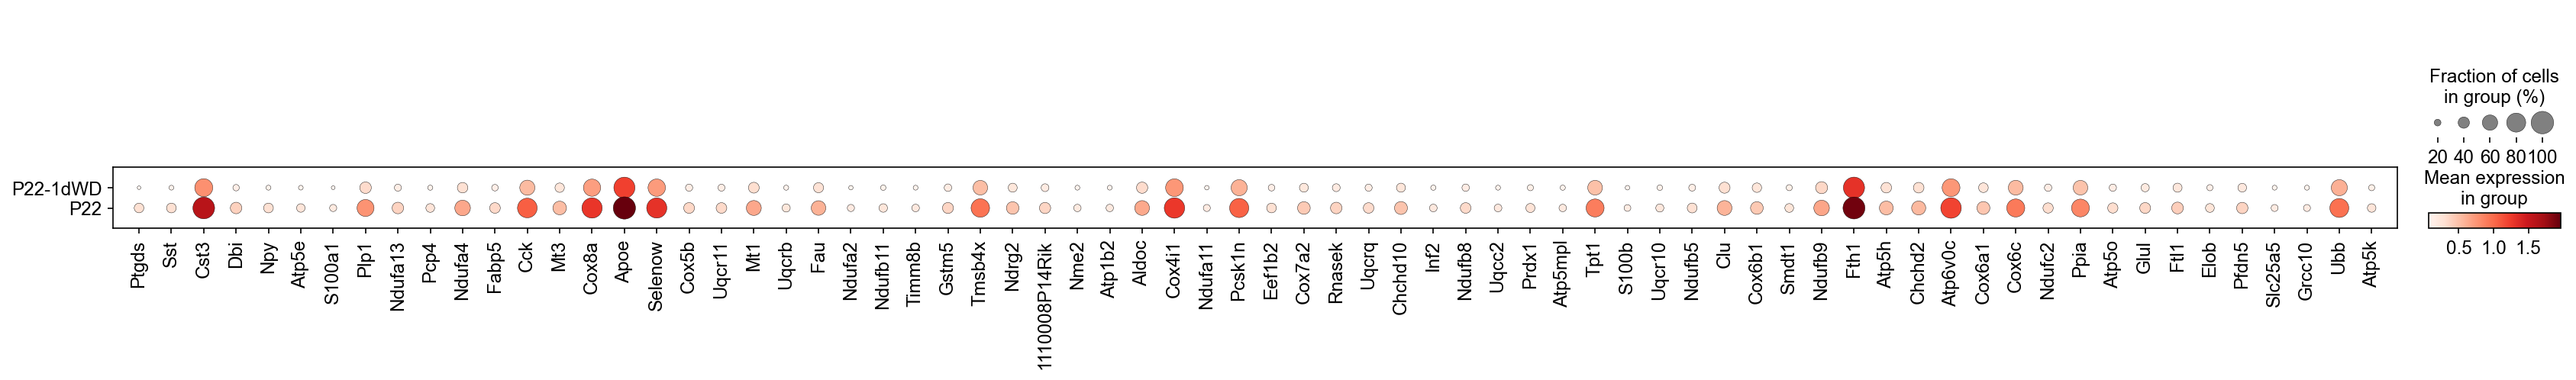

L4_P22


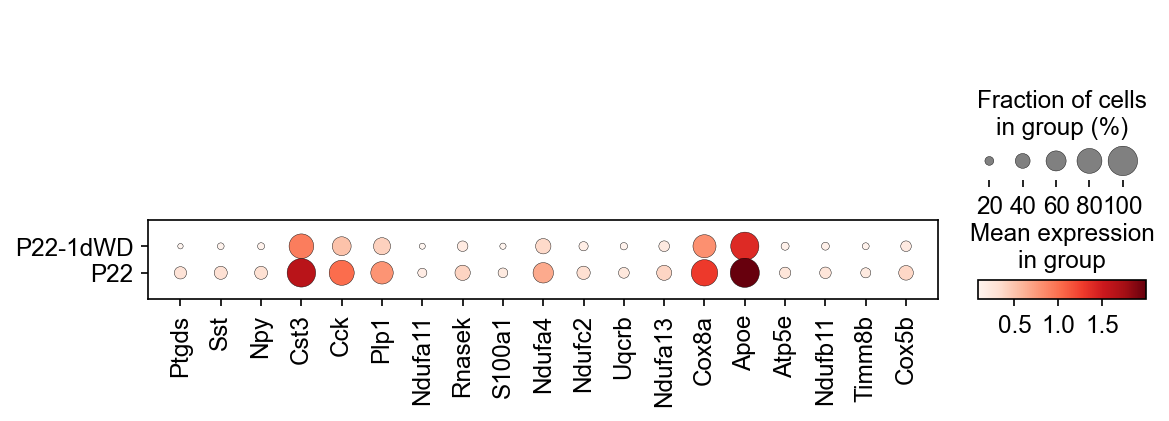

L5IT_P22


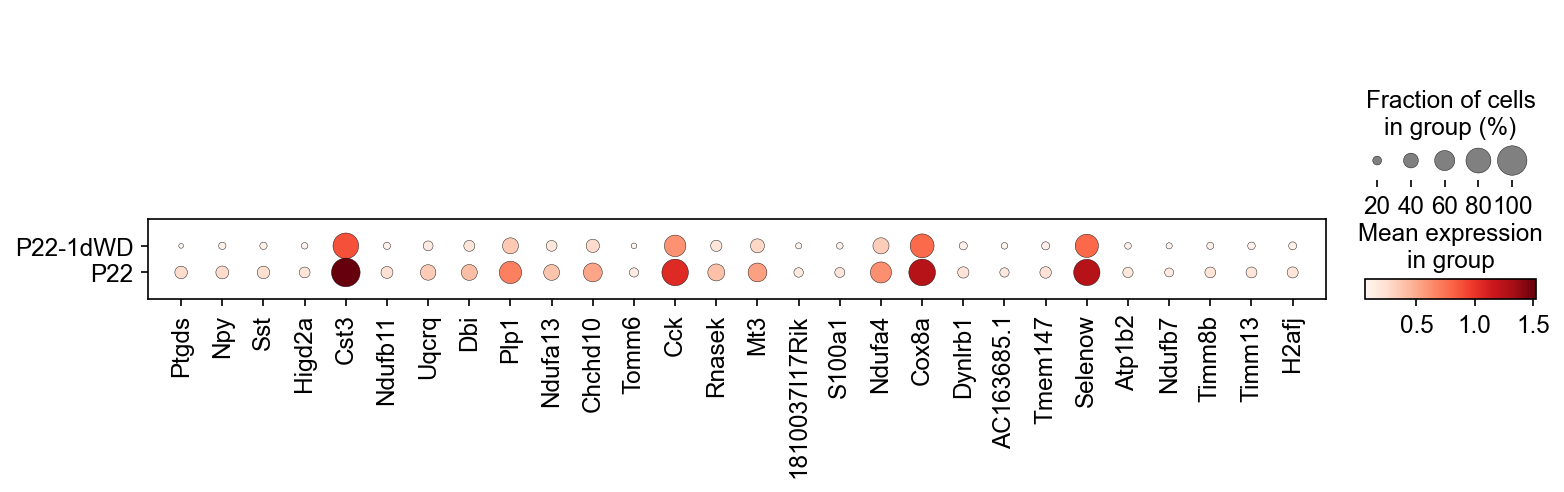

L5NP_P22


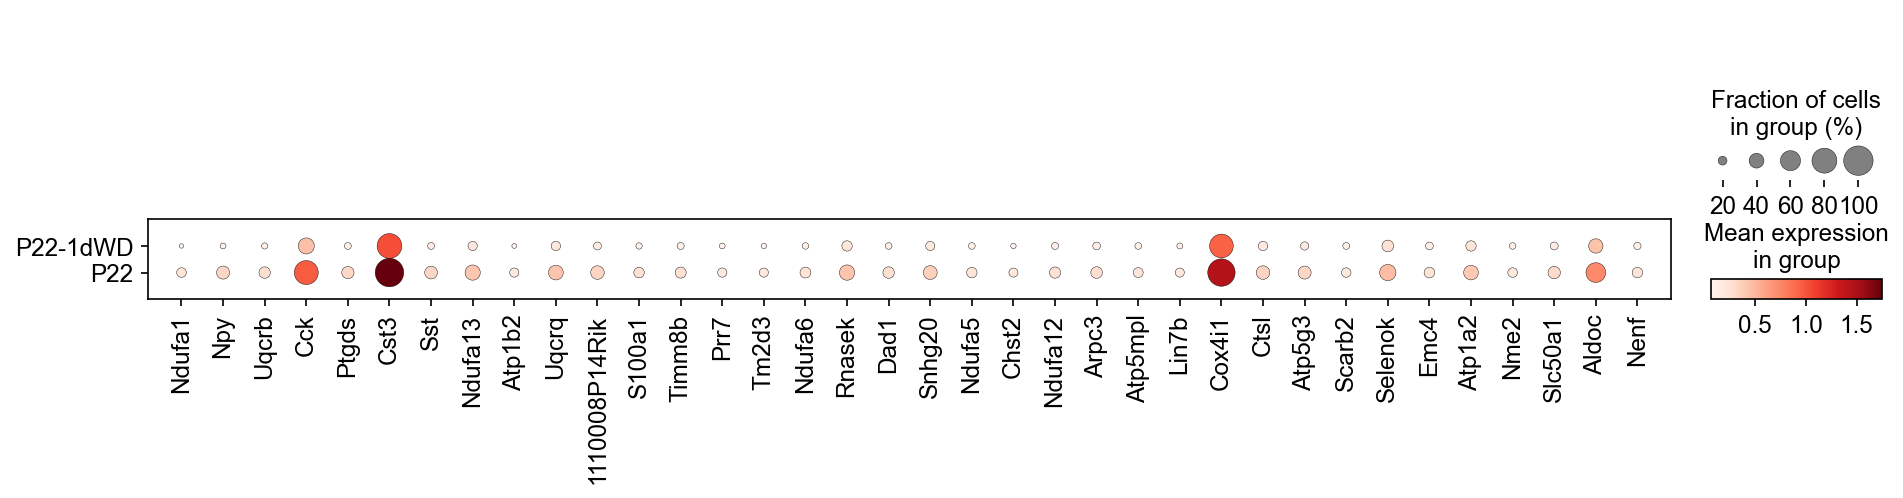

L5PT_P22


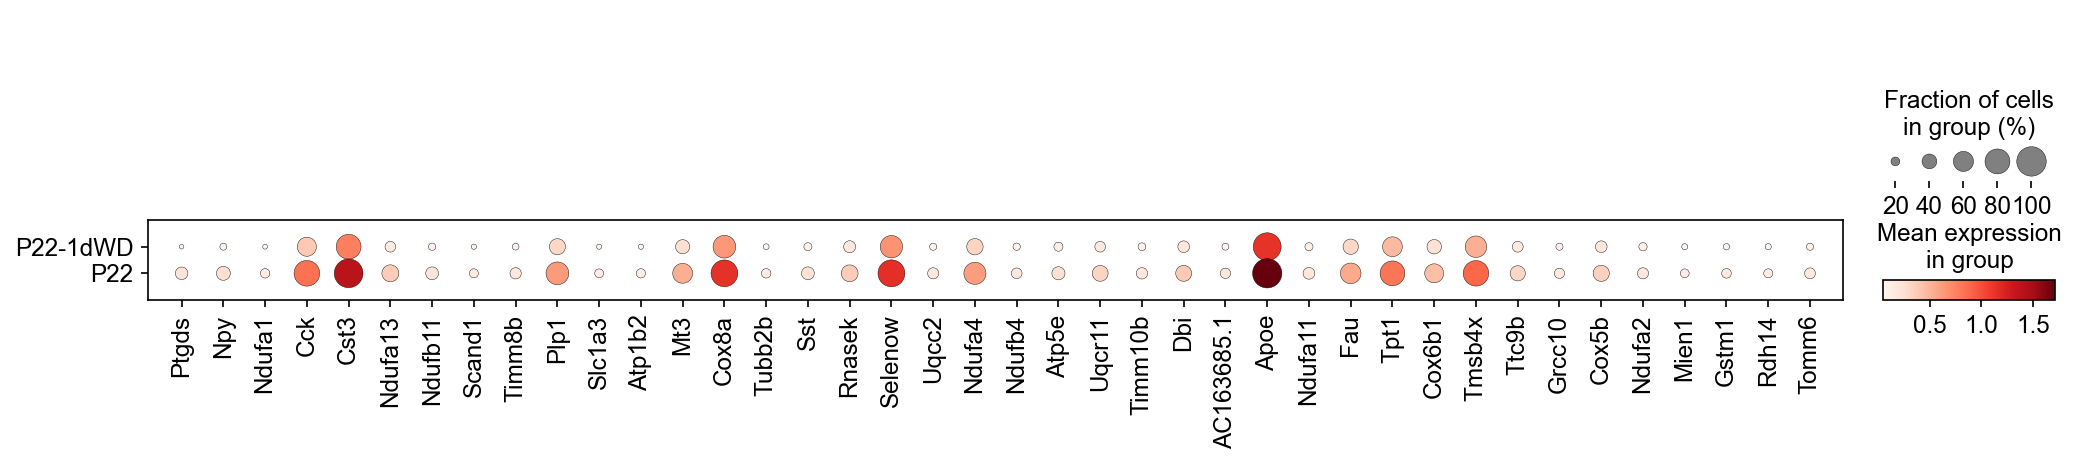

L6CT_P22


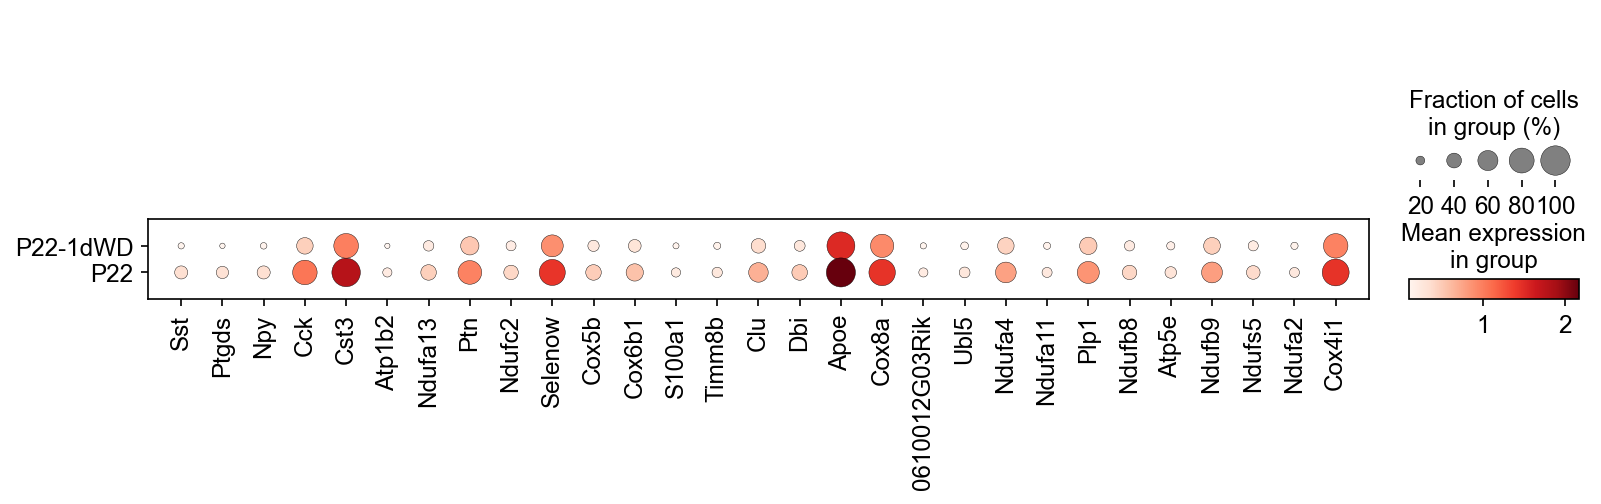

L6IT_P22


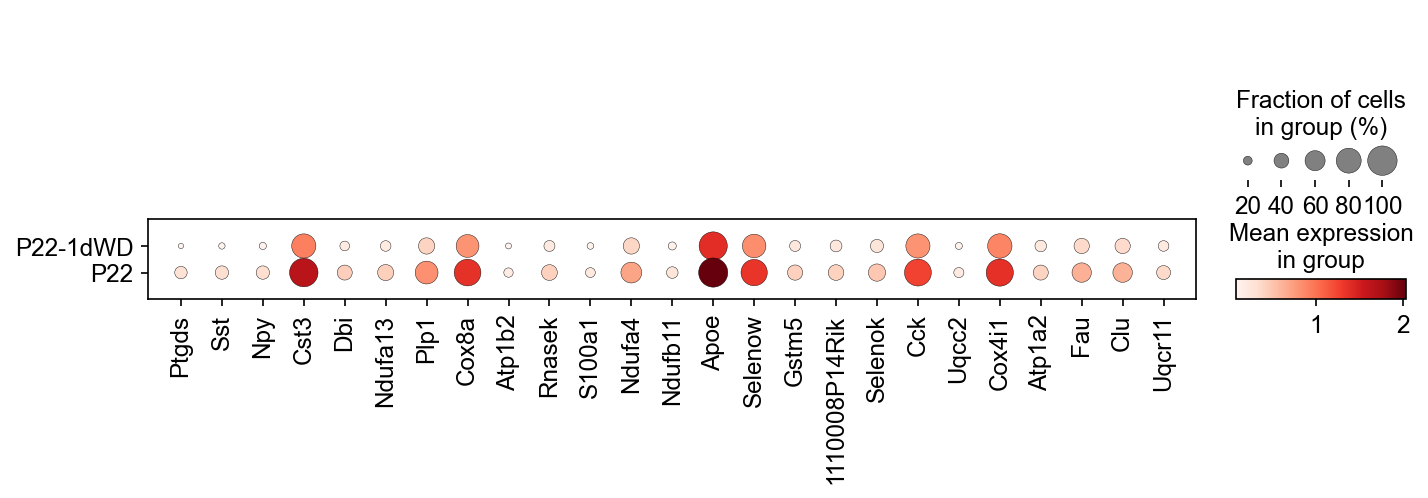

L6b_P22


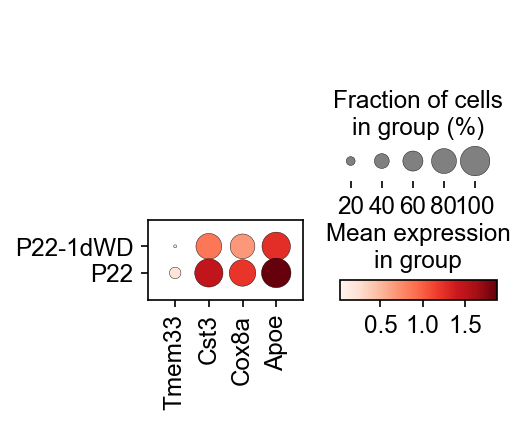

Pvalb_P22


ValueError: max() arg is an empty sequence

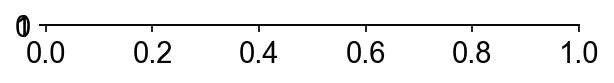

In [66]:
for i in gluta_dict_P22:
    print(i)
    sc.pl.dotplot(gluta[gluta.obs.Subclass==i.split('_')[0],:], gluta_dict_P22[i].index, 'Condition')

### DE genes Tables

In [85]:
import pandas as pd
import re

def sanitize_sheet_name(sheet_name):
    # Replace invalid characters with an underscore or another character of your choice
    sanitized_name = re.sub(r'[\\/*?:\[\]]', '_', sheet_name)
    # Optionally, limit the length of the sheet name to 31 characters
    return sanitized_name[:31]

file_path = 'Tables/TableS6.xlsx'

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    for sheet_name, df in glugab1d.items():
        sanitized_name = sanitize_sheet_name(sheet_name+'>P22')
        df.columns = ["Percent Cells Expressing", 'log2fold-change'] + df.columns.tolist()[2:]
        df.to_excel(writer, sheet_name=sanitized_name, index=True)
    for sheet_name, df in glugab22.items():
        # Sanitize the sheet name before writing
        sanitized_name = sanitize_sheet_name(sheet_name+'>WD1d')
        # Change the first column name to "Percent Cells Expressing"
        df.columns = ["Percent Cells Expressing", 'log2fold-change'] + df.columns.tolist()[2:]
        # Write the DataFrame to the corresponding sheet
        df.to_excel(writer, sheet_name=sanitized_name, index=True)